In [41]:
# Проект 2. Разведывательный анализ данных (EDA)
""""
Проделаем следующие этапы EDA:
-Определение проблемы;
-Извлечение данных;
-Подготовка данных — очистка данных;
-Подготовка данных — преобразование данных;
-Исследование и визуализация данных.

Проведем анализ основных свойств данных, сделаем поиск в них общих закономерностей, 
распределений и аномалий, построим начальные модели, с использованием инструментов визуализации.

Суть проекта (проблема) — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,
чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Разведывательный анализ данных (EDA)

"""

'"\nПроделаем следующие этапы EDA:\n-Определение проблемы;\n-Извлечение данных;\n-Подготовка данных — очистка данных;\n-Подготовка данных — преобразование данных;\n-Исследование и визуализация данных.\n\nПроведем анализ основных свойств данных, сделаем поиск в них общих закономерностей, \nраспределений и аномалий, построим начальные модели, с использованием инструментов визуализации.\n\nСуть проекта (проблема) — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике,\nчтобы на ранней стадии выявлять студентов, находящихся в группе риска.\n\nРазведывательный анализ данных (EDA)\n\n'

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('stud_math.csv')
# df['price_doc'] = df['price_doc'].apply(lambda w: np.log(w+1))  -убрать???
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [15]:
# Смотрим сколько у нас признаков и с какого типа данными мы имеем дело.
# Всего 29 признаков и 1 показатель центральный ("score")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
pstatus                350 non-null object
medu                   392 non-null float64
fedu                   371 non-null float64
mjob                   376 non-null object
fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [16]:
df.isnull().sum()
# Проверяем наличие пропусков. Пропуски есть, но их количество некритично (<10%).

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [2]:
display(df['DESCR'])

KeyError: 'DESCR'

In [ ]:
Определение проблемы;
Извлечение данных;
Подготовка данных — очистка данных;
Подготовка данных — преобразование данных;
Исследование и визуализация данных;

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [85]:
# Меняем название столбцом на удобные нам:
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
              'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
              'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
              'freetime', 'goout', 'health', 'absences', 'score']
df.columns  # Смотрим что получилось

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

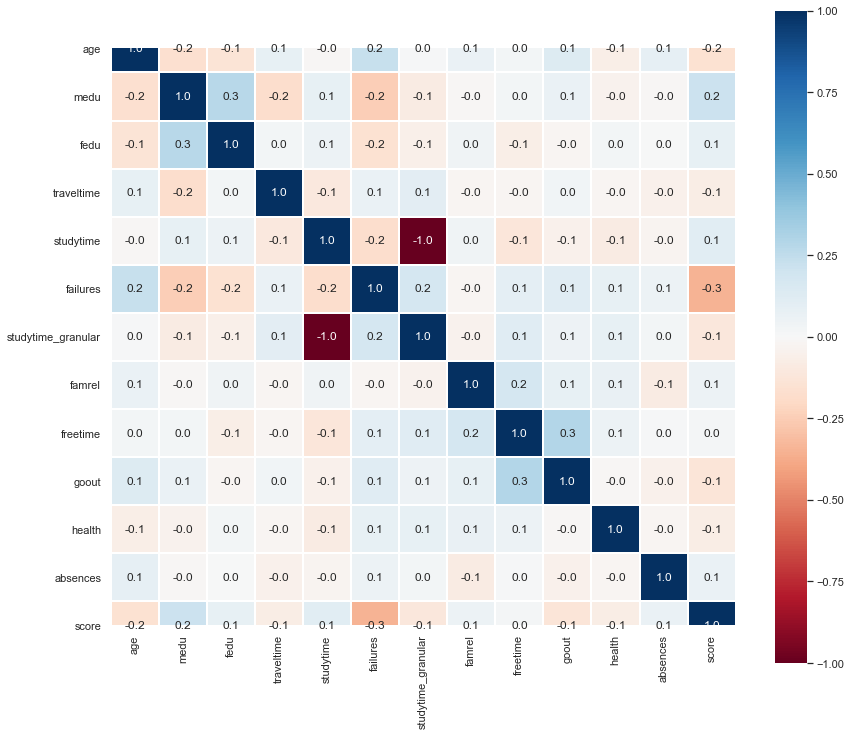

In [86]:
# Приступаем к анализу признаков.
# Проверяем на мультиколлинеарность и кореляцию числовых признаков между собой и с главным признаком "score":
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
plt.subplots(figsize=(14, 12))
sns.heatmap(df.corr(), square=True, annot=True,
            fmt=".1f", linewidths=1, cmap="RdBu")

In [ ]:
# Коррелирующие с  "score" числовые показатели:
'age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 'goout', 'health', 'absences'
#Сильно коррелирующих признаков - нет. Скорее можно говорить о "размазанности" влияния множества признаков на показатель "score".
# НЕкоррелирующие с  "score" числовые показатели:
'freetime' (можно удалить этот признак)
df.drop(['freetime'], inplace=True, axis=1)
# FEDU, MEDU умеренно коррелируют между собой. Можно попробовать удалить один из них. Удалим 'fedu'.
df.drop(['fedu'], inplace=True, axis=1)
# Сильно коррелирующие  (-1.0) между собой показатели (мультиколинеарность):
'studytime' - 'studytime_granular'.  # Можно убрать один из показателей (?). Убираем 'studytime, granular'
df.drop(['studytime_granular'], inplace=True, axis=1)

In [5]:
# school - аббревиатура школы, в которой учится ученик. Признак  категориальный.
# Как видно, у этого признака нормальное распределение, выбросов нет. Пропусков нет.Показатель "школы" важный, оставить.
pd.DataFrame(df.school.value_counts())
# В числовом выражении доминируют школьники из школы GP.

,school
GP,349
MS,46


In [65]:
# sex — пол ученика ('F' - женский, 'M' - мужской). Признак  категориальный.
# Как видно, у этого признака нормальное распределение, выбросов нет. Пропусков нет.Показатель -важный.
pd.DataFrame(df.sex.value_counts())
# Распределение на м\ж примерно поровну.

,sex
F,208
M,187


In [53]:
# age - показатель возраста ученика. Признак числовой.Важный, оставляем.
pd.DataFrame(df.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

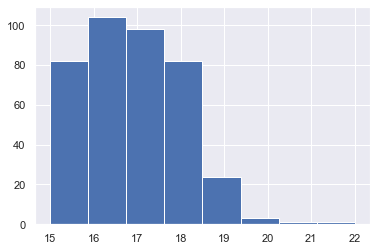

In [6]:
df.age.hist(bins=8)
df.age.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.Пропусков нет.
# Средний возраст -17 лет

In [4]:
# address- Признак "тип адреса ученика ('U' - городской, 'R' - за городом)". Признак  категориальный.
pd.DataFrame(df.address.value_counts(dropna=False))
# Как видим - значительная часть учеников городские.

,address
U,295
R,83
NaN,17


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

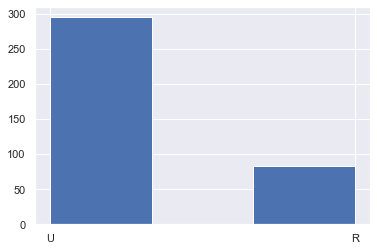

In [8]:
df.address.hist(bins=3)
df.address.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет. Есть пропуски - заполнить нет возможности.
# Можно удалить строки с пропусками.
#df.address.dropna(axis=0, how='all', inplace=True)

In [7]:
# Можно заполнить пропуски часто встречающимися значениями:
df[['address']].fillna(df['address'].value_counts().index[0])


,address
0,U
1,U
2,U
3,U
4,U
...,...
390,U
391,U
392,R
393,R


In [5]:
# Признак famsize - размер семьи('LE3' <= 3, 'GT3' >3). Признак категориальный.
pd.DataFrame(df.famsize.value_counts(dropna=False))
# 2/3 учеников из семей, где более 3 детей.

,famsize
GT3,261
LE3,107
NaN,27


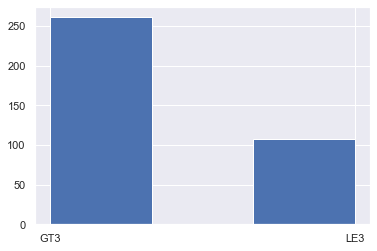

In [9]:
df.famsize.hist(bins=3)
df.famsize.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.Есть пропуски (27) - заполнить нет возможности (?).
# Можно удалить cтроки с пропусками.
df.famsize.dropna(axis=0, how='all', inplace=True)

In [6]:
# Признак pstatus - статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно).
pd.DataFrame(df.pstatus.value_counts(dropna=False))
#  Признак категориальный.Подавляющее большинство родителей учеников проживают вместе.

,pstatus
T,314
NaN,45
A,36


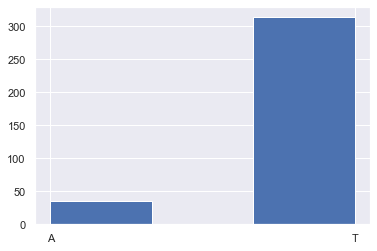

In [10]:
df.pstatus.hist(bins=3)
df.pstatus.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.Есть пропуски (45) - заполнить нет возможности.
# Можно удалить cтроки с пропусками или заполнить чаще встречающимся значением ("Т"), но тогда возможен перекос в сторону Т.
# Лучше удалим.
df.pstatus.dropna(axis=0, how='all', inplace=True)

In [7]:
# Признак medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Признак бинарный, но по сути категориальный.
# Признак  числовой, но по сути категориальный.
pd.DataFrame(df.medu.value_counts(dropna=False))

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

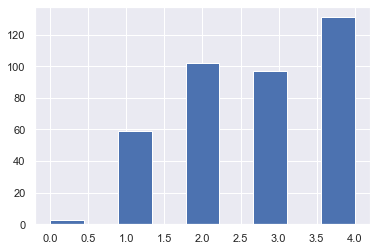

In [13]:
df.medu.hist(bins=9)
df.medu.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.

In [5]:
# Есть пропуски - заполнить нет возможности.
# Можно строки с пропусками (3шт)  - заменить на часто встречающиеся.
# df['medu'].value_counts().index[0]
-> 4.0
# df[['medu']].fillna(4.0)
# или:
df[['medu']].fillna(df['medu'].value_counts().index[0])

4.0

In [8]:
# Признак fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Признак бинарный, но по сути категориальный.
# Признак  числовой, но по сути категориальный.
pd.DataFrame(df.fedu.value_counts(dropna=False))  # -удаляем как дублирующий признак.?

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


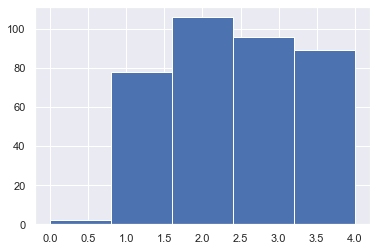

In [16]:
df.fedu.hist(bins=5)
df.fedu.describe()
# Как видно, у этого признака нормальное распределение, выбросы есть - значение 40.
# Его надо заменить на реальное(например самое частое  или предположительное -"4")
df['fedu'] = df['fedu'].replace(40, 4)
# Есть пропуски - заполнить нет возможности.
# Можно строки с пропусками (24шт)  - заменить на самое частое() или удалить. Голосуем за - удалить.
df.fedu.dropna(axis=0, how='all', inplace=True)

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

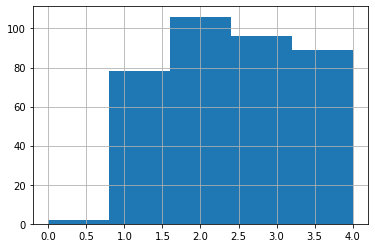

In [26]:
df.fedu.hist(bins=5)
df.fedu.describe()

In [9]:
# Признак mjob - работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.mjob.value_counts(dropna=False))

,mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


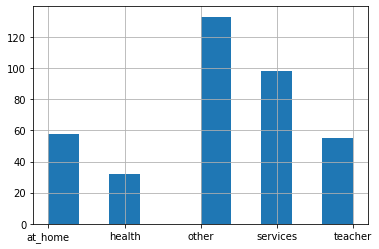

In [32]:
df.mjob.hist(bins=10)
df.mjob.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски  - заполнить нет возможности.
# Можно удалить cтроки с пропусками (19 шт.)
df.mjob.dropna(axis=0, how='all', inplace=True)

count       359
unique        5
top       other
freq        197
Name: fjob, dtype: object

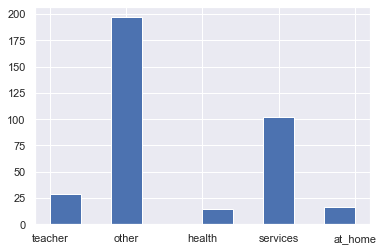

In [27]:
# Признак Fjob - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.fjob.value_counts(dropna=False))
df.fjob.hist()
df.fjob.describe()
# Как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (36 шт).
df[['fjob']].dropna(axis=0)

In [10]:
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.reason.value_counts(dropna=False))

,reason
course,137
home,104
reputation,103
other,34
NaN,17


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

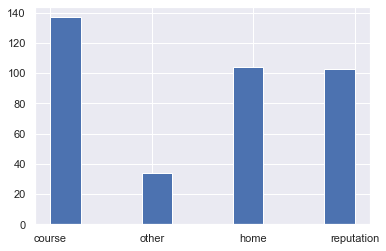

In [28]:
df.reason.hist()
df.reason.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски (17шт.) - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.reason.dropna(axis=0, how='all', inplace=True)

In [11]:
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# Признак  категориальный.
pd.DataFrame(df.guardian.value_counts(dropna=False))

,guardian
mother,250
father,86
NaN,31
other,28


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

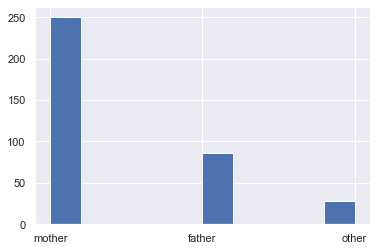

In [30]:
df.guardian.hist()
df.guardian.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.guardian.dropna(axis=0, how='all', inplace=True)

In [4]:
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
pd.DataFrame(df.traveltime.value_counts())
# Признак  числовой, но по сути категориальный.
# Более у половины учеников время в пути <15 мин.

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


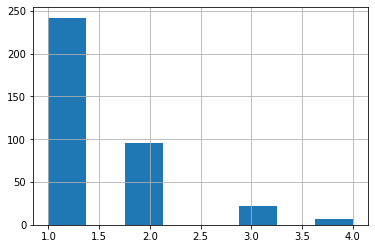

In [39]:
df.traveltime.hist(bins=8)
df.traveltime.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.traveltime.dropna(axis=0, how='all', inplace=True)

In [11]:
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
pd.DataFrame(df.studytime.value_counts())
# Признак  числовой, но по сути категориальный.
# # Более половины учеников тратят от 2 до 5 часов  на учебу помимо школы.

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

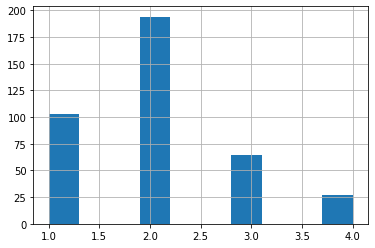

In [17]:
df.studytime.hist()
df.studytime.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.studytime.dropna(axis=0, how='all', inplace=True)

In [13]:
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
pd.DataFrame(df.failures.value_counts())
# Признак  числовой, но по сути категориальный.
# 2/3 учеников не имеют внеучебных неудач.

,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

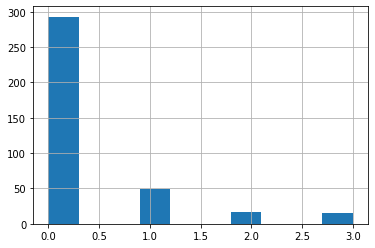

In [16]:
df.failures.hist()
df.failures.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками.
df.failures.dropna(axis=0, how='all', inplace=True)

In [20]:
# schoolsup — дополнительная образовательная поддержка (yes или no).
pd.DataFrame(df.schoolsup.value_counts())
# Признак  категориальный.
# Более 3/4 учеников имеют дополнительная образовательная поддержка.

,schoolsup
no,335
yes,51


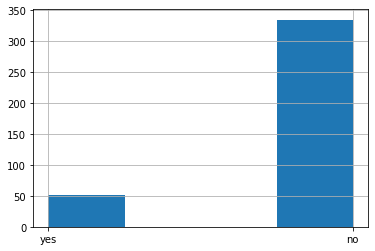

In [38]:
df.schoolsup.hist(bins=4)
df.schoolsup.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (9 шт.).
df.schoolsup.dropna(axis=0, how='all', inplace=True)

In [23]:
# famsup — семейная образовательная поддержка (yes или no)
pd.DataFrame(df.famsup.value_counts())
# Признак  категориальный.
# Более 2/3 учеников имеют семейная образовательная поддержка.

,famsup
yes,219
no,137


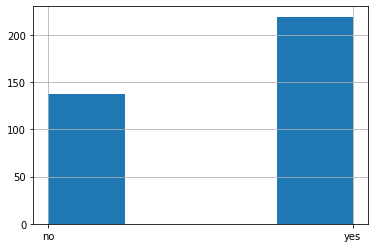

In [37]:
df.famsup.hist(bins = 4)
df.famsup.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками, хотя их много (39 шт.).
df.famsup.dropna(axis=0, how='all', inplace=True)

In [26]:
# paid — дополнительные платные занятия по математике (yes или no)
pd.DataFrame(df.paid.value_counts())
# Признак  категориальный.
# Более 2/3 учеников имеют дополнительные платные занятия по математике.

,paid
no,200
yes,155


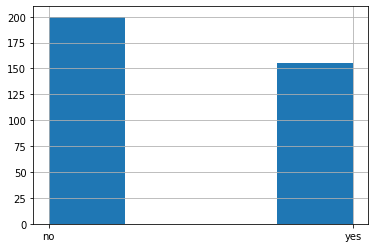

In [40]:
df.paid.hist(bins=4)
df.paid.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (40 шт.).
# df[['paid']].dropna(axis=0)
df.paid.dropna(axis=0, how='all', inplace=True)

In [31]:
# studytime_ granular — ??? (без описания нет). Признак сильно коррелирует с studytime (отрицательная корреляция -1).
# Признак числовой, но по сути категориальный.
pd.DataFrame(df.studytime_granular.value_counts())

,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

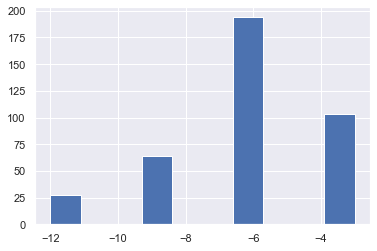

In [32]:
df.studytime_granular.hist()
df.studytime_granular.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (7 шт.).
df.studytime_granular.dropna(axis=0, how='all', inplace=True)

In [33]:
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
pd.DataFrame(df.famrel.value_counts())
# Признак числовой, но по сути категориальный.
# Как видим, у 3/4 учеников семейные отношения хорошие (4,5 балов)

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


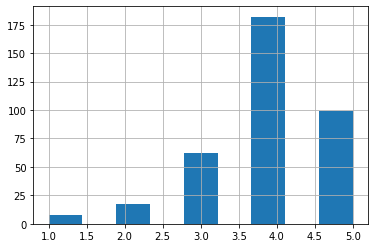

In [44]:
df.famrel.hist(bins=9)
df.famrel.describe()
# Как видно, у этого признака нормальное распределение, есть выбросы - значение "-1"(находится за пределами возможных значений).
# Выбросы предлагаем заменить на предположительное значение "1":
df['famrel'] = df['famrel'].replace(-1, 1)
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (27 шт.).
df.famrel.dropna(axis=0, how='all', inplace=True)

In [36]:
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# Признак числовой, но по сути категориальный. Признак вообще не коррелирует с "score". Поэтому в будущем его можно вообще удалить.
pd.DataFrame(df.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


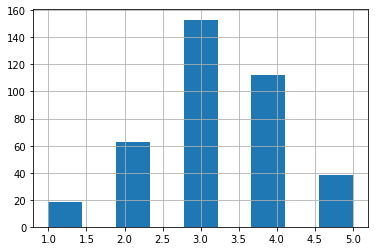

In [45]:
df.freetime.hist(bins=9)
df.freetime.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (11 шт.).
# df[['freetime']].dropna(axis=0)
df.freetime.dropna(axis=0, how='all', inplace=True)

In [38]:
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много).
# Признак числовой, но по сути категориальный.
pd.DataFrame(df.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


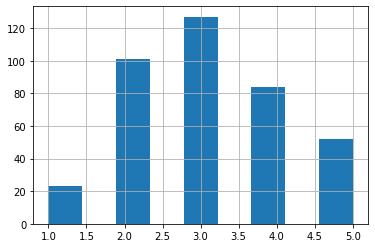

In [46]:
df.goout.hist(bins=9)
df.goout.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (11 шт.).
df.goout.dropna(axis=0, how='all', inplace=True)

In [40]:
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# Признак числовой, но по сути категориальный.
pd.DataFrame(df.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


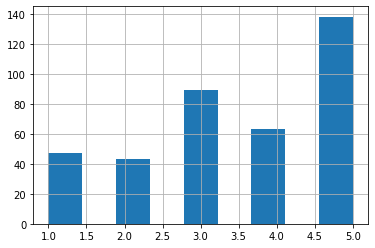

In [47]:
df.health.hist(bins=9)
df.health.describe()
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть пропуски - заполнить нет возможности.
# Можно удалить cтроки с пропусками (15 шт.).
df.health.dropna(axis=0, how='all', inplace=True)
# Как видим у 1/3 учеников очень хорошее здоровье и в целом 2/3 учеников проблем со здоровьем не имеют.

In [42]:
# absences — количество пропущенных занятий.
# Признак числовой.
pd.DataFrame(df.absences.value_counts())
# Как видим, более 1/3 учеников занятия вообще не пропускали.

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

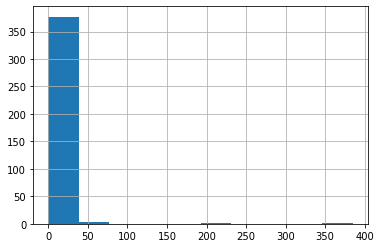

In [48]:
df.absences.hist()
df.absences.describe()
# как видно, у этого признака нормальное распределение, выбросы есть - "385" и "212". Заменить "mean"/среднее значение.
# Есть пропуски (12 шт) - заполнить можно средним значением.

In [82]:
pd.DataFrame(df.absences.value_counts()).dropna(0)

,absences
2.000000,60
4.000000,53
6.000000,30
8.000000,21
10.000000,17
7.279373,14
14.000000,12
12.000000,12
3.000000,8
16.000000,7


count    284.000000
mean       8.072942
std        8.341556
min        1.000000
25%        3.750000
50%        6.000000
75%       10.000000
max       75.000000
Name: absences, dtype: float64

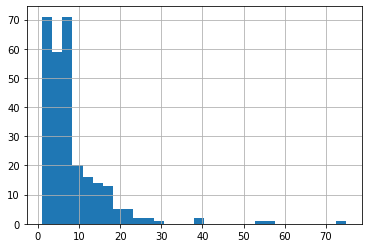

In [81]:
# - заполняем пропуски средним арифм значением колонки
mean = df['absences'].mean()
df.fillna(mean, inplace=True)
df['absences'] = df['absences'].replace(385, mean)
df['absences'] = df['absences'].replace(212, mean)
# Уберем тех, у кого пропусков 0.
pd.DataFrame(df.absences.value_counts()).dropna(0,inplace=True)
df.absences.hist(bins=30)
df.absences.describe()
# Как видим в среднем пропусков 8 уроков.

In [102]:
# score — баллы по госэкзамену по математике. Признак - предсказываемая величина.
# Признак числовой.
#df['score'] = df['score'].apply(lambda w: np.log(w+1)) # не помню зачем мы логарифмируем, но вроде надо ???))
pd.DataFrame(df.score.value_counts(dropna=False))

,score
50.000000,43
55.000000,40
65.000000,27
40.000000,25
45.000000,23
60.000000,22
70.000000,21
75.000000,18
30.000000,14
80.000000,12


count    284.000000
mean      55.304214
std       17.531900
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

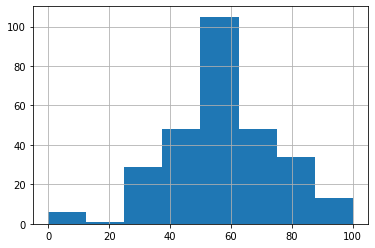

In [83]:
# как видно, у этого признака нормальное распределение, выбросов нет.
# Есть 37шт. результатов 0.0. Что это значит? Человек вообще не пришел?
# Может быть удалить эти результаты (или заменить средним mean)?
# Есть пропуски (6 шт) - заполнить можно средним значением.
# - заполняем пропуски средним арифм значением колонки
mean = df['score'].mean()
df.fillna(mean, inplace=True)
df.score.hist(bins=8)
df.score.describe()

count    284.000000
mean      55.498947
std       17.219810
min        7.279373
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

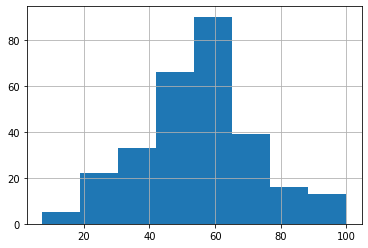

In [84]:
# Есть 37шт. результатов 0.0. Что это значит? Человек вообще не пришел? 
# Может быть удалить эти результаты (или заменить средним mean)?
df.fillna(mean, inplace=True)
df.isnull().sum()
df['score'] = df['score'].replace(0.0, mean)
df.score.hist(bins=8)
df.score.describe()

In [96]:
# Cоздадим итоговый датафрейм очищенный от пропусков и ненужных признаков:
# Дропнуть  пропуски в столбцах можно и одной командой сразу во всех нужных столбцах:
# df[['fjob', "famsize","pstatus",.....]].dropna( inplace=True,axis=0)

#df.address.dropna(axis=0, how='all', inplace=True)
df[['address']].fillna(df['address'].value_counts().index[0])
df.famsize.dropna(axis=0, how='all', inplace=True)
df.pstatus.dropna(axis=0, how='all', inplace=True)
df[['medu']].fillna(df['medu'].value_counts().index[0])
df['fedu'] = df['fedu'].replace(40, 4)
df.fedu.dropna(axis=0, how='all', inplace=True)
df.mjob.dropna(axis=0, how='all', inplace=True)
df.fjob.dropna(axis=0, how='all', inplace=True)
df[['fjob']].dropna(axis=0)
df.reason.dropna(axis=0, how='all', inplace=True)
df.guardian.dropna(axis=0, how='all', inplace=True)
df.traveltime.dropna(axis=0, how='all', inplace=True)
df.studytime.dropna(axis=0, how='all', inplace=True)
df.failures.dropna(axis=0, how='all', inplace=True)
df.schoolsup.dropna(axis=0, how='all', inplace=True)
df.famsup.dropna(axis=0, how='all', inplace=True)
df.paid.dropna(axis=0, how='all', inplace=True)
df.activities.dropna(axis=0, how='all', inplace=True)
df.nursery.dropna(axis=0, how='all', inplace=True)
df.higher.dropna(axis=0, how='all', inplace=True)
df.internet.dropna(axis=0, how='all', inplace=True)
df.romantic.dropna(axis=0, how='all', inplace=True)
df.studytime_granular.dropna(axis=0, how='all', inplace=True)
df.famrel.dropna(axis=0, how='all', inplace=True)
df.goout.dropna(axis=0, how='all', inplace=True)
df.health.dropna(axis=0, how='all', inplace=True)
#df.drop(['freetime'], inplace=True, axis=1)
#df.freetime.dropna(axis=0, how='all', inplace=True)
#df.drop(['fedu'], inplace=True, axis=1)
mean1 = df['absences'].mean()
#df.absences.fillna(mean1, inplace=True)
df['absences'] = df['absences'].replace(385, mean1)
df['absences'] = df['absences'].replace(212, mean1)
pd.DataFrame(df.absences.value_counts()).dropna(0,inplace=True)
mean2 = df['score'].mean()
#df.score.fillna(mean2, inplace=True)
df=df.dropna()
df.isnull().sum()

school                0
sex                   0
age                   0
address               0
famsize               0
pstatus               0
medu                  0
fedu                  0
mjob                  0
fjob                  0
reason                0
guardian              0
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
studytime_granular    0
higher                0
internet              0
romantic              0
famrel                0
goout                 0
health                0
absences              0
score                 0
dtype: int64

In [86]:
# смотрим коррелляцию числовых признаков между собой.
df.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,goout,health,absences,score
age,1.000000,-0.153273,-0.143257,0.003361,-0.048969,0.027878,0.023881,0.082805,0.098073,-0.080004,0.188742,-0.188255
medu,-0.153273,1.000000,0.426072,-0.080210,0.023254,-0.042692,-0.040424,-0.036525,0.122496,-0.056243,0.099748,0.200960
fedu,-0.143257,0.426072,1.000000,-0.114023,0.004465,-0.024814,-0.056812,-0.023460,0.070449,0.040339,0.059329,0.097155
traveltime,0.003361,-0.080210,-0.114023,1.000000,0.001743,0.064484,0.055749,-0.055770,-0.030054,0.070086,-0.055460,-0.043692
studytime,-0.048969,0.023254,0.004465,0.001743,1.000000,0.014027,-0.090454,0.042870,-0.034322,0.002853,-0.085657,0.166609
failures,0.027878,-0.042692,-0.024814,0.064484,0.014027,1.000000,0.069112,0.034150,-0.035811,0.006122,0.026682,-0.019967
studytime_granular,0.023881,-0.040424,-0.056812,0.055749,-0.090454,0.069112,1.000000,-0.033531,0.035779,0.035998,0.046500,-0.028402
famrel,0.082805,-0.036525,-0.023460,-0.055770,0.042870,0.034150,-0.033531,1.000000,0.024733,0.149350,0.087946,-0.045441
goout,0.098073,0.122496,0.070449,-0.030054,-0.034322,-0.035811,0.035779,0.024733,1.000000,-0.028839,-0.049733,-0.177340
health,-0.080004,-0.056243,0.040339,0.070086,0.002853,0.006122,0.035998,0.149350,-0.028839,1.000000,-0.028778,-0.098287


In [ ]:
# можно убрать сильно скореллированные: сильной корреляции между числовыми признаками НЕТ. 
#Fedu & Medu относительно коррелируют между собой. Можно удалить Fedu.(?)

In [31]:
# Выясним, какие столбцы коррелируют с оценкой по математике ("score").
# Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

# Корреляции рассмотрим только для числовых столбцов.

# Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:


SyntaxError: invalid syntax (<ipython-input-31-3745e9496c2d>, line 1)

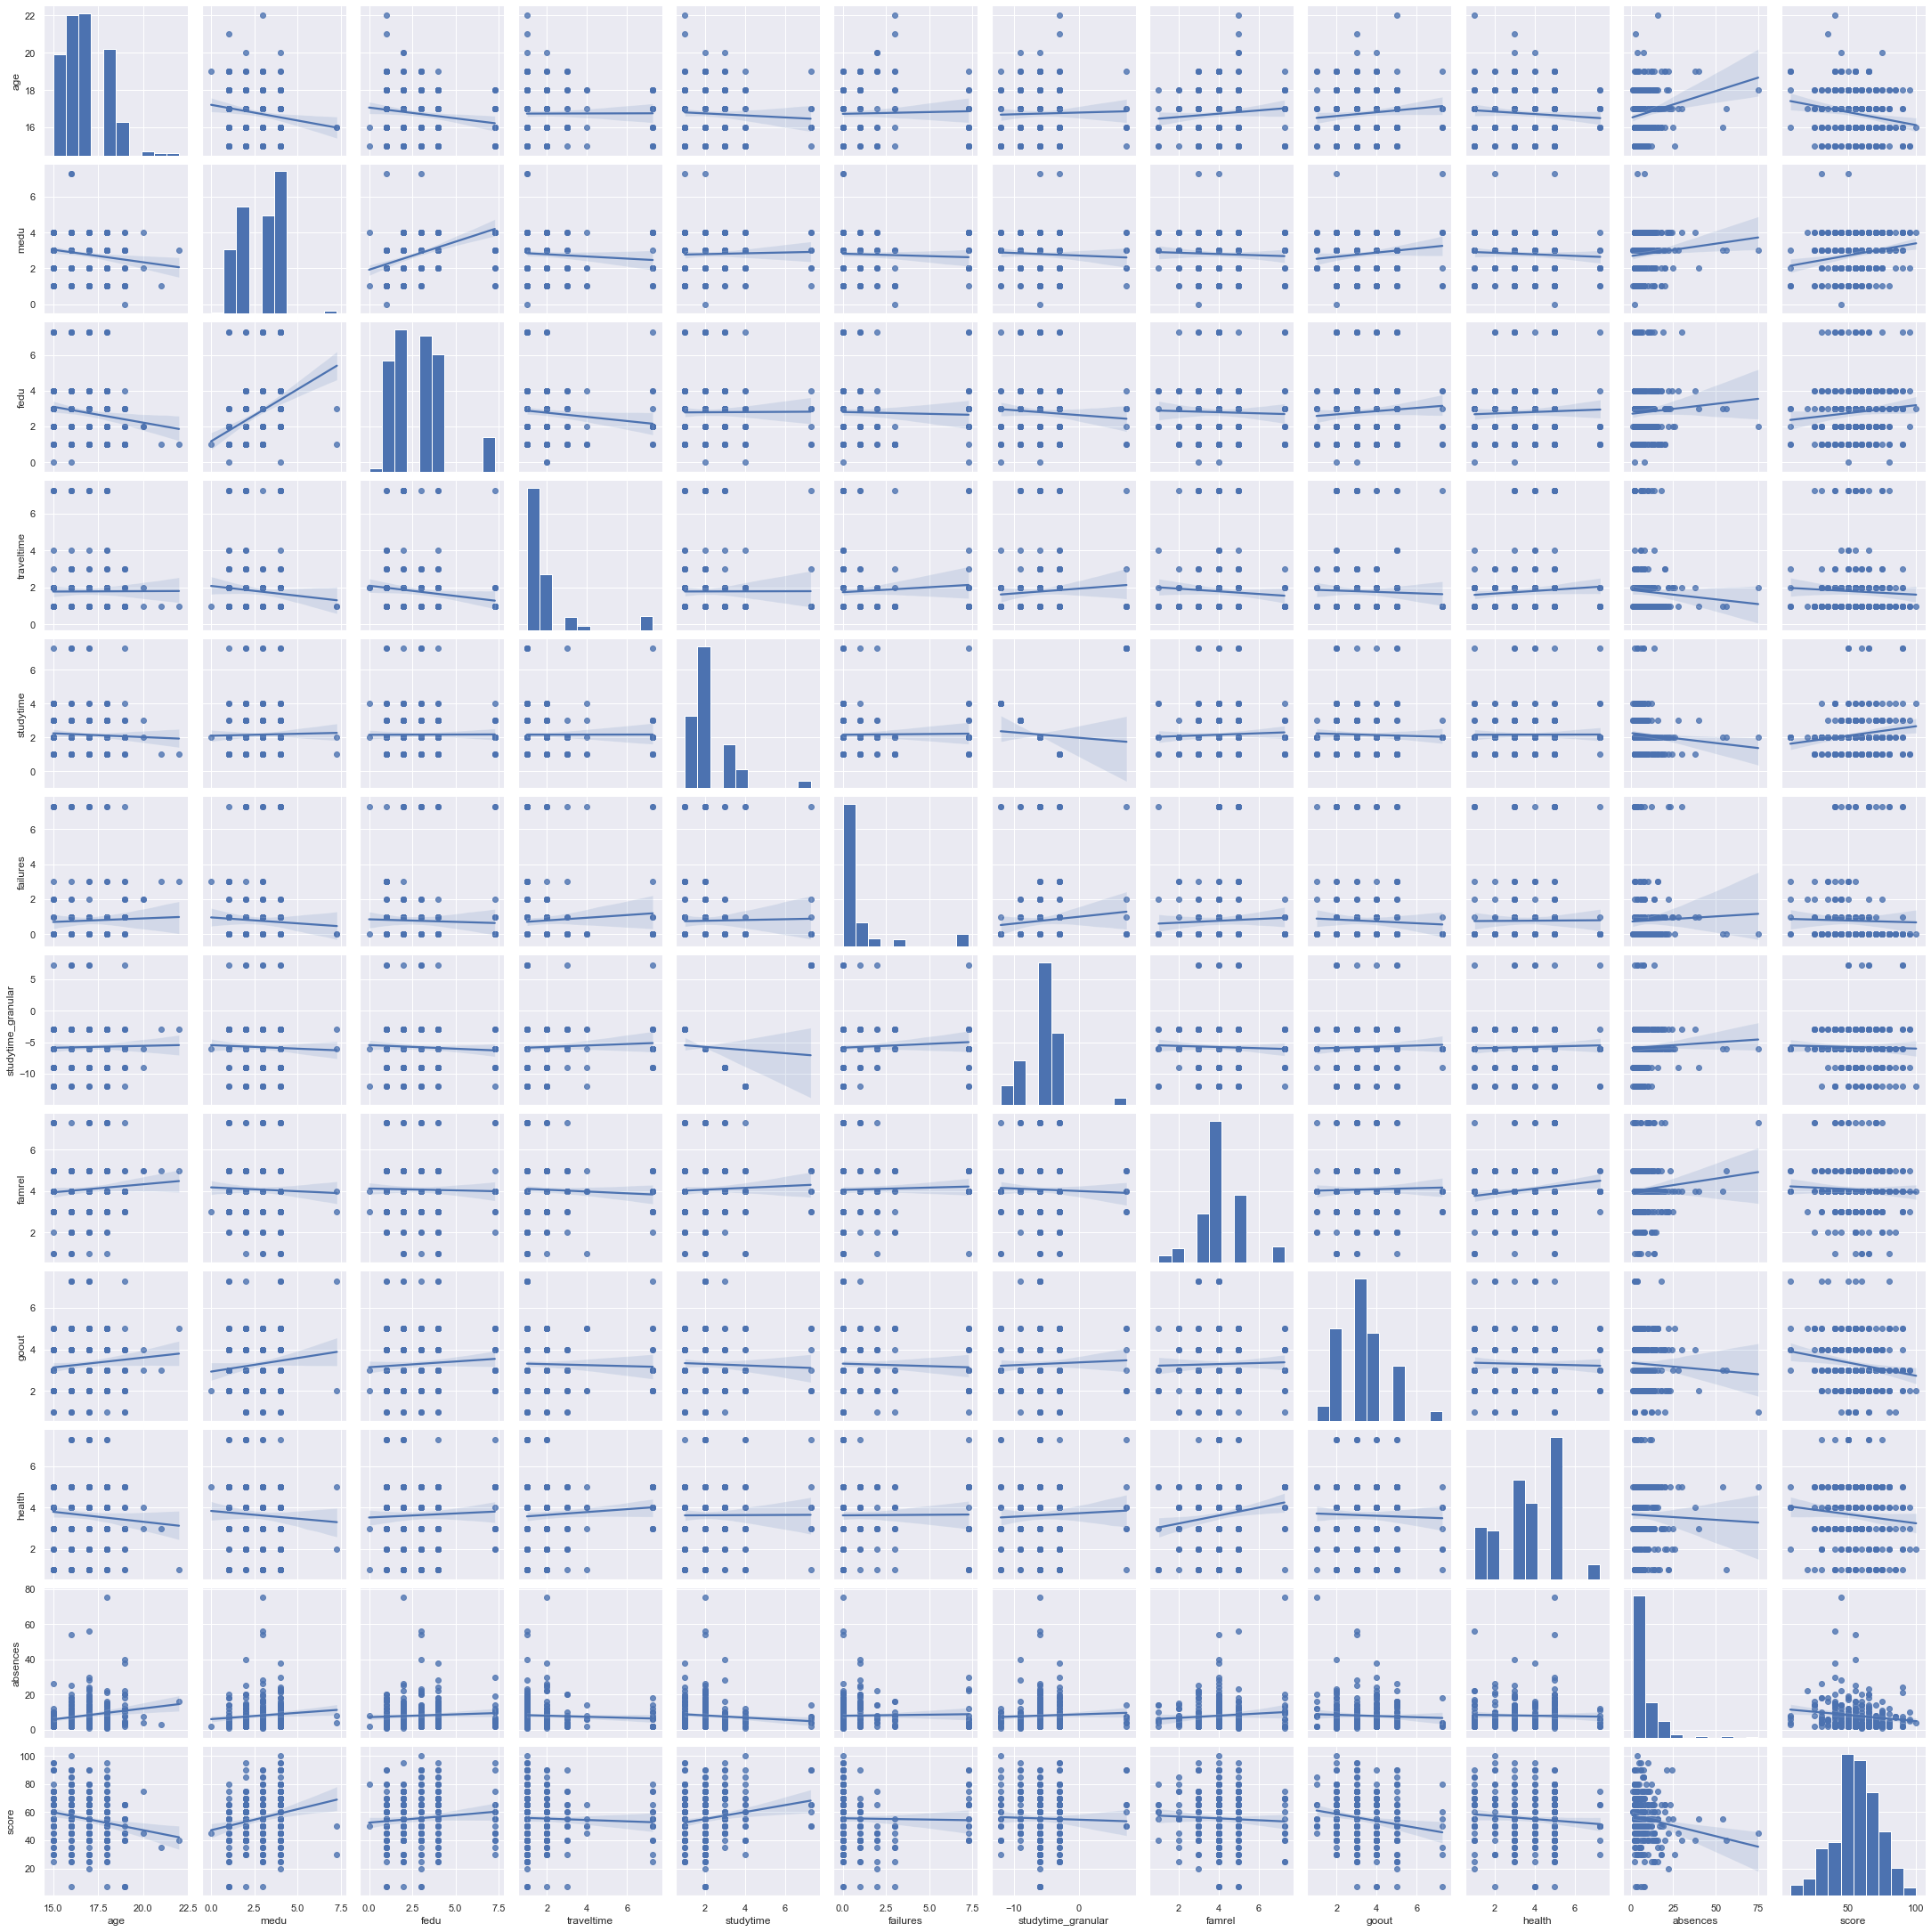

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, kind = 'reg')

In [34]:
# Анализ номинативных признаков:
# Очевидно, что для номинативных переменных использовать корреляционный анализ не получится.
# Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например,
# с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

In [ ]:
# Номинативные переменные, которые осталось рассмотреть:
'sex', 'address', 'famsize', 'pstatus', 'mjob',
'fjob', 'reason', 'guardian',
'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'higher', 'internet', 'romantic'
# и бинарные категориальные:
"health",  "goout", "freetime", "famrel", "studytime_granular", "failures", "studytime","traveltime"

In [89]:
# - напишем функцию
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

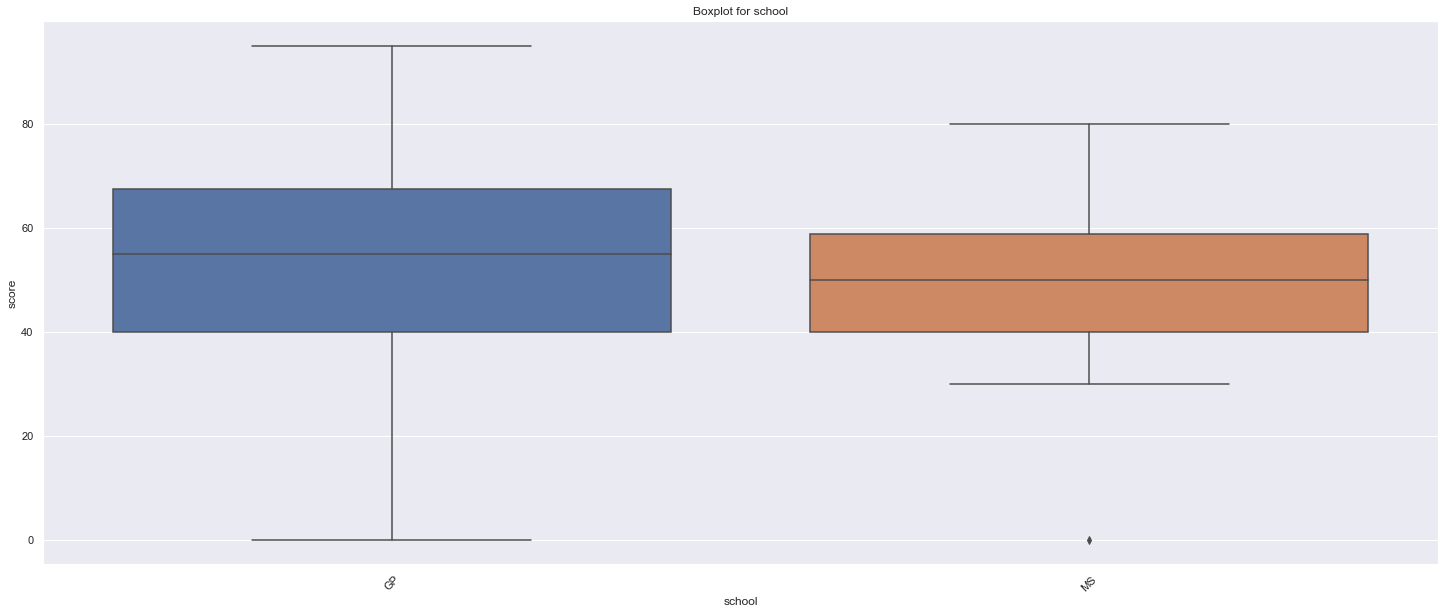

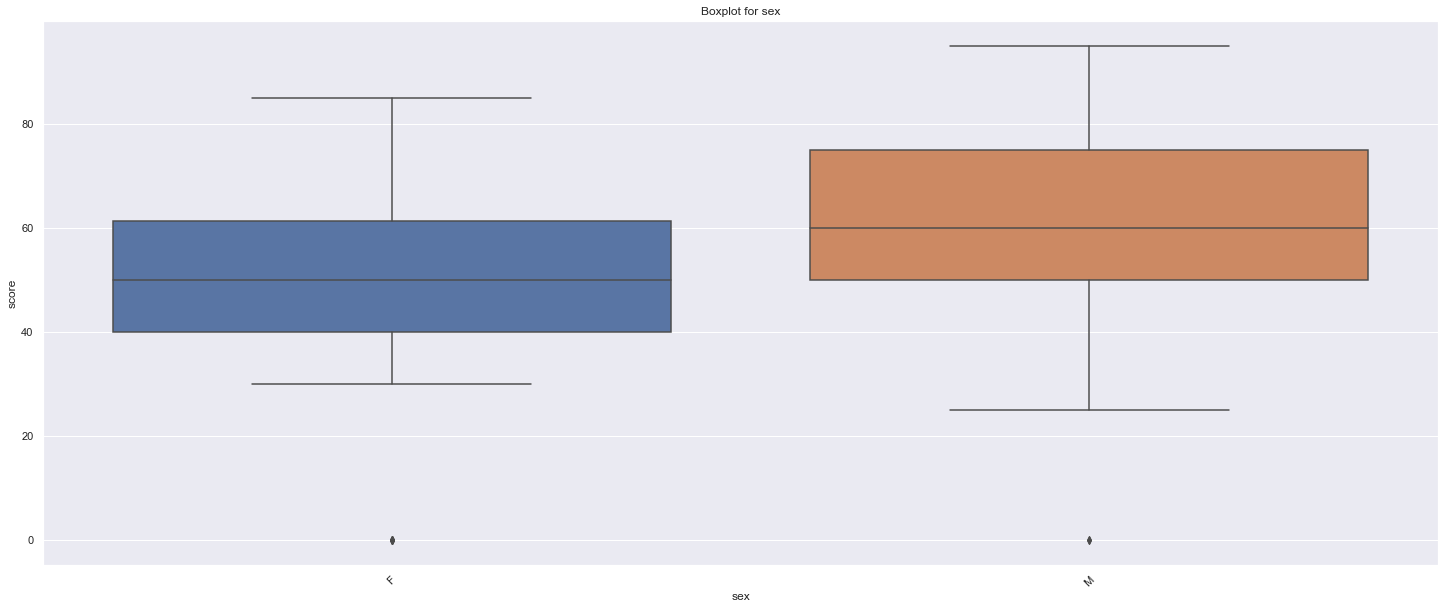

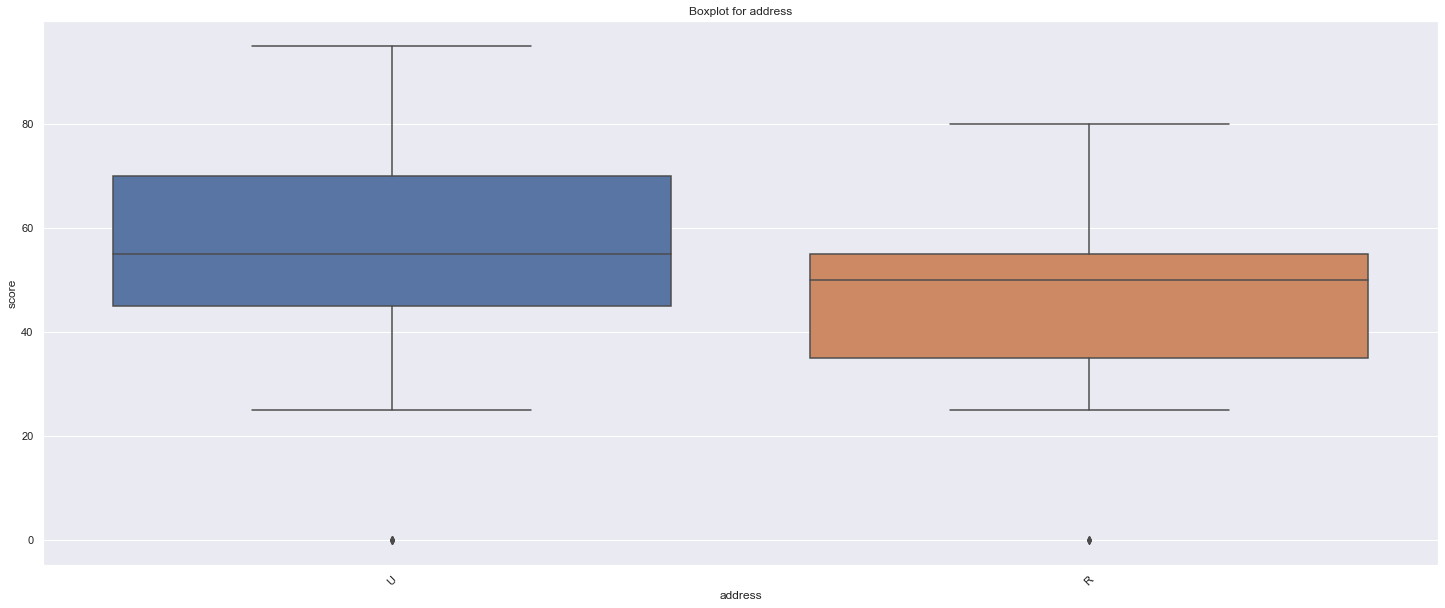

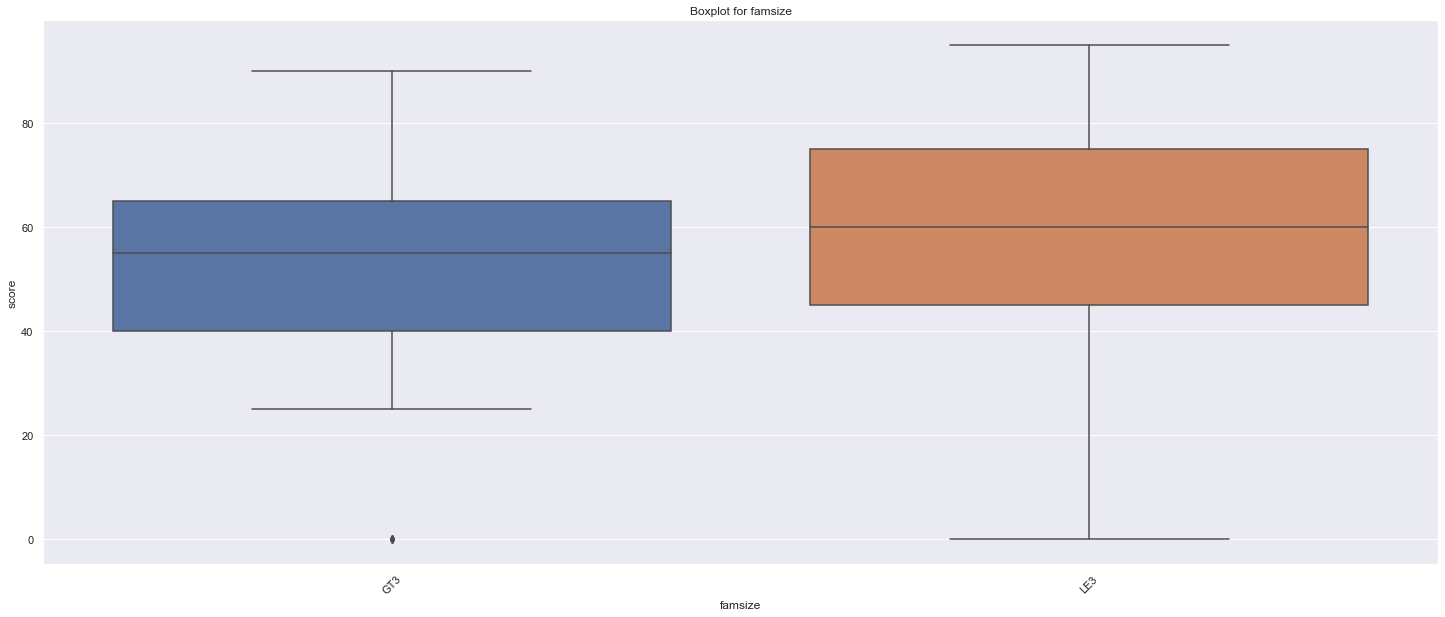

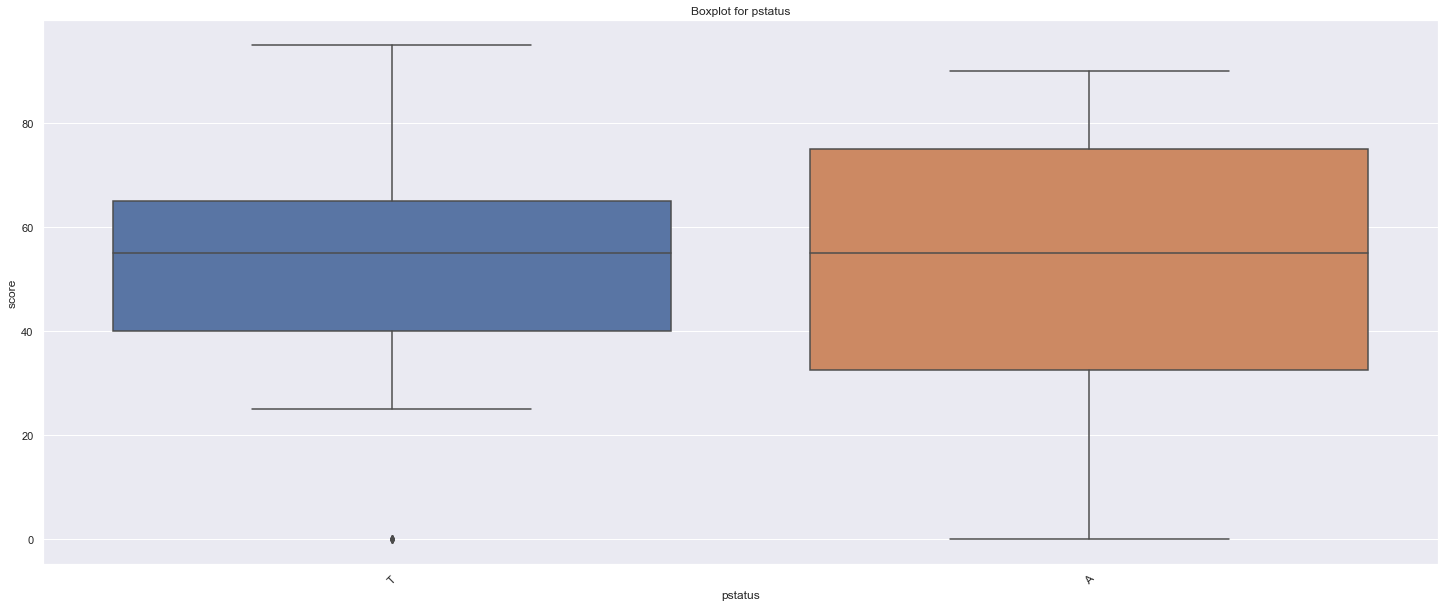

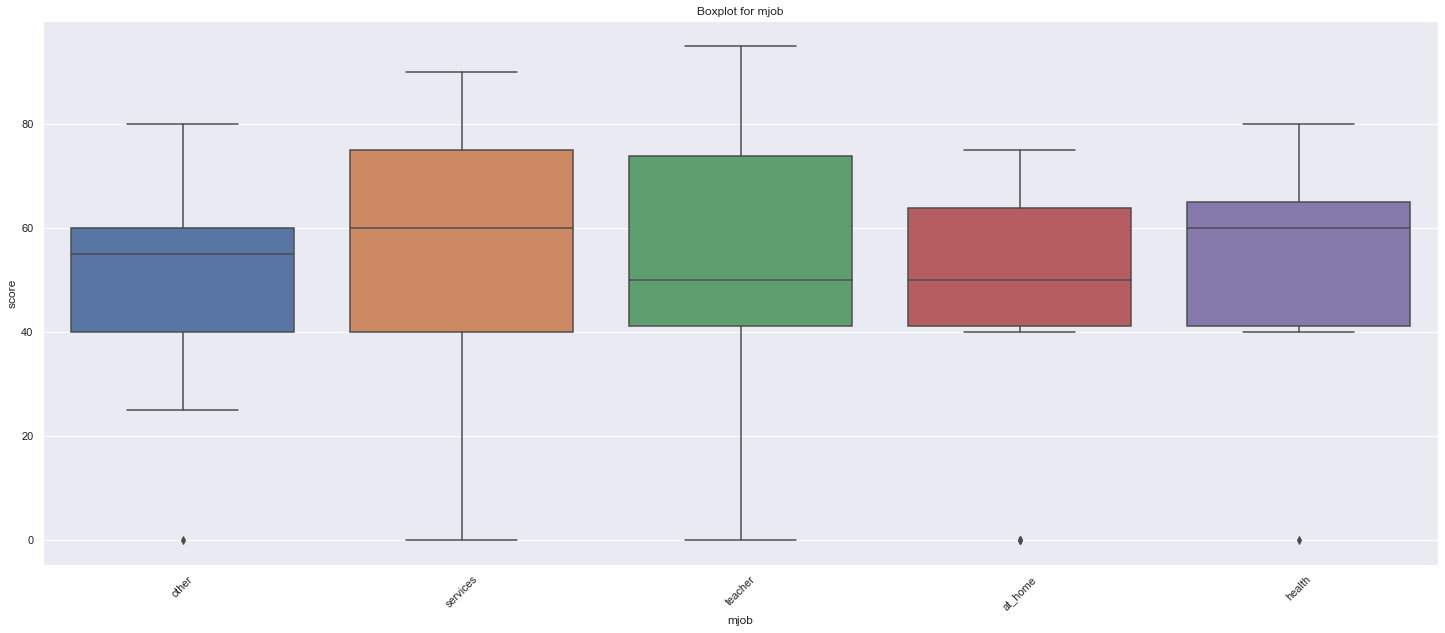

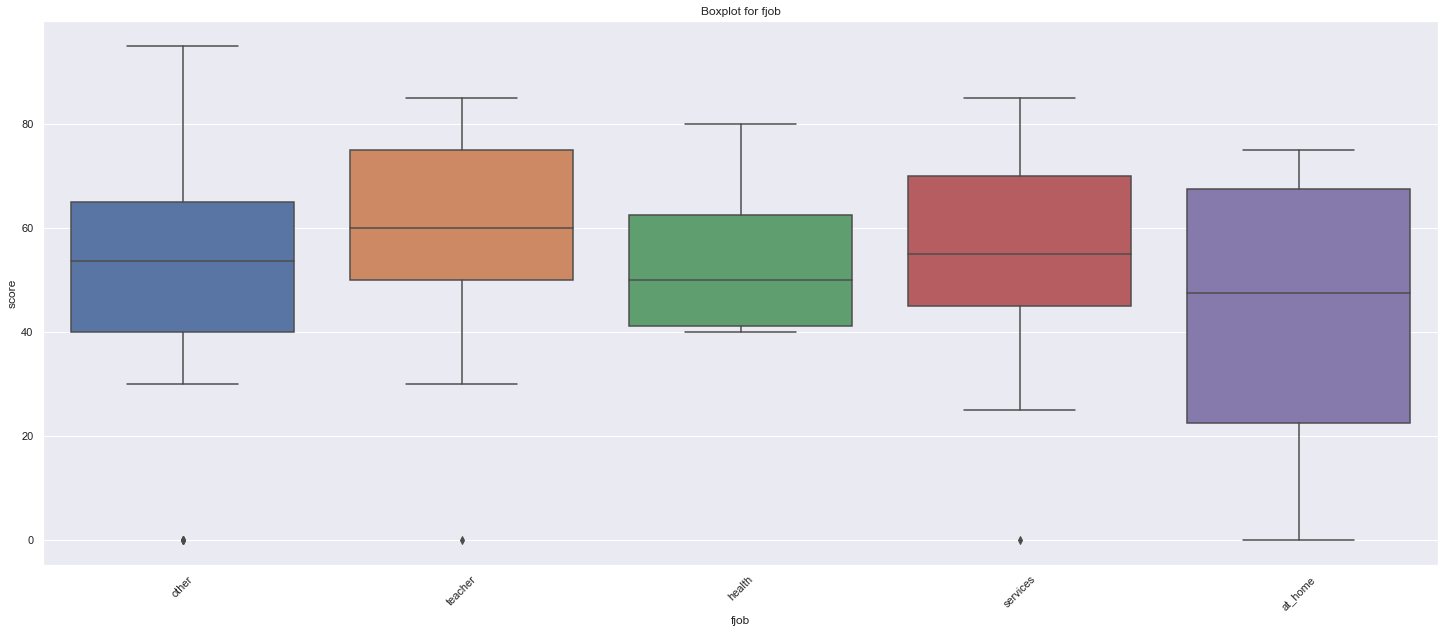

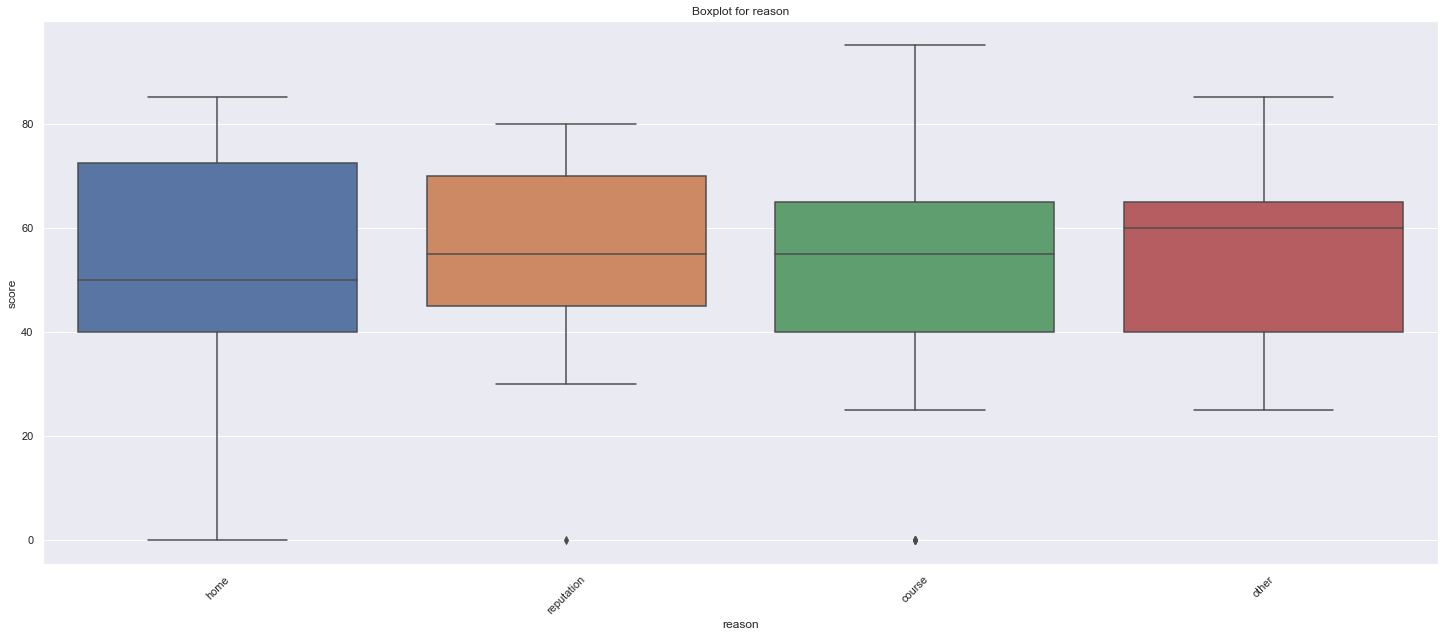

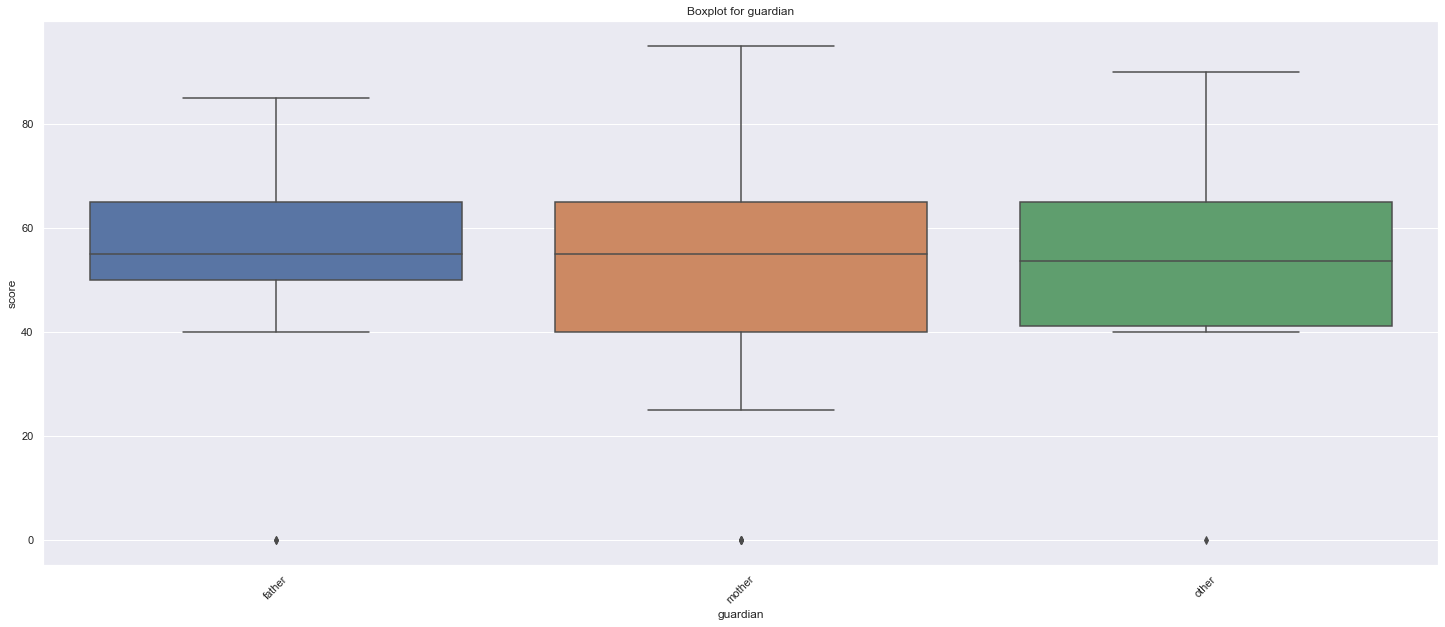

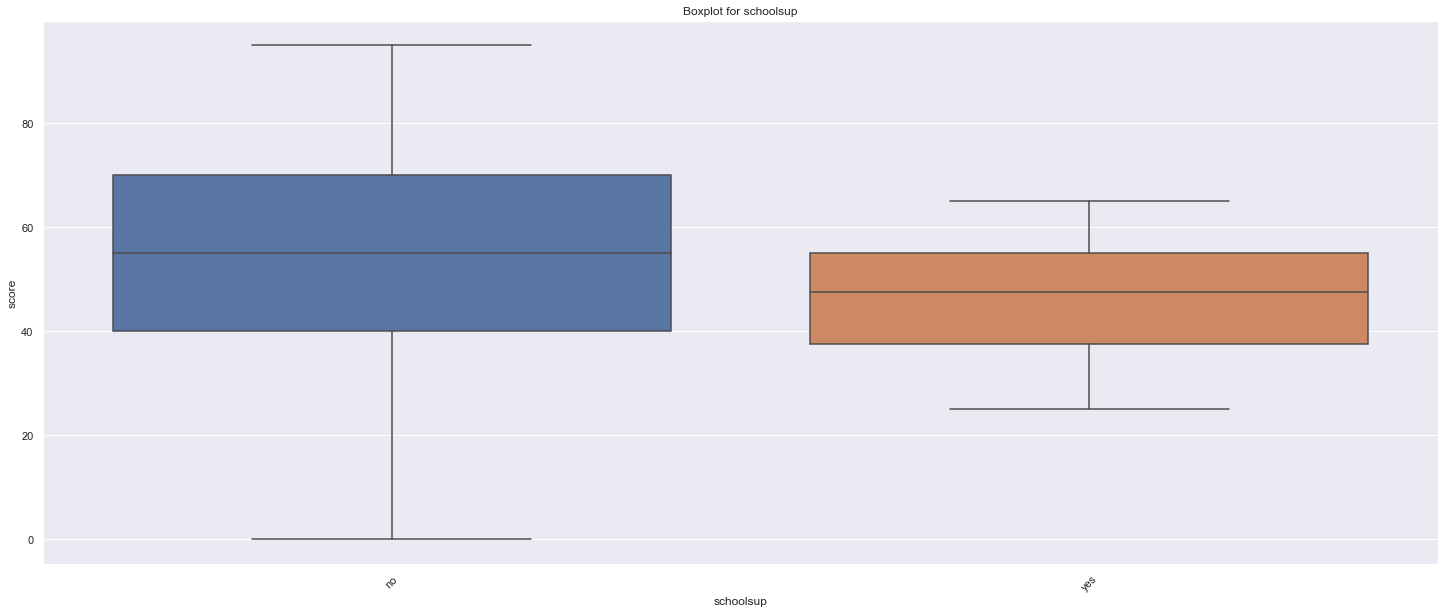

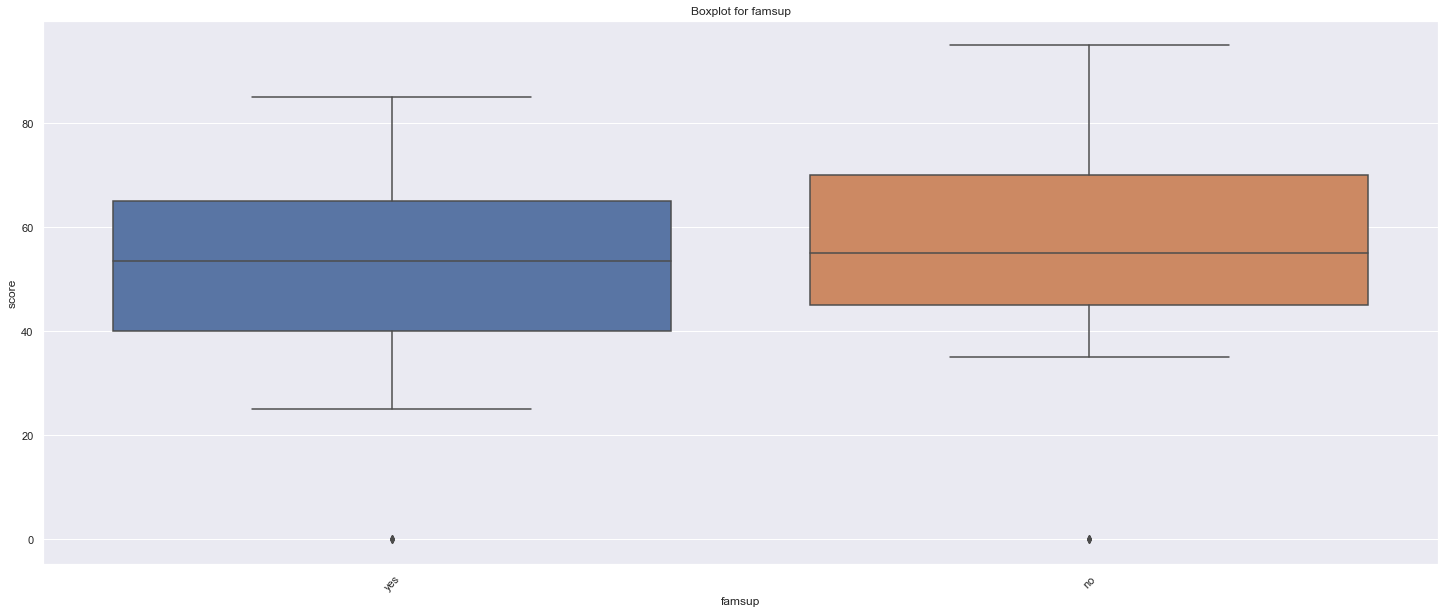

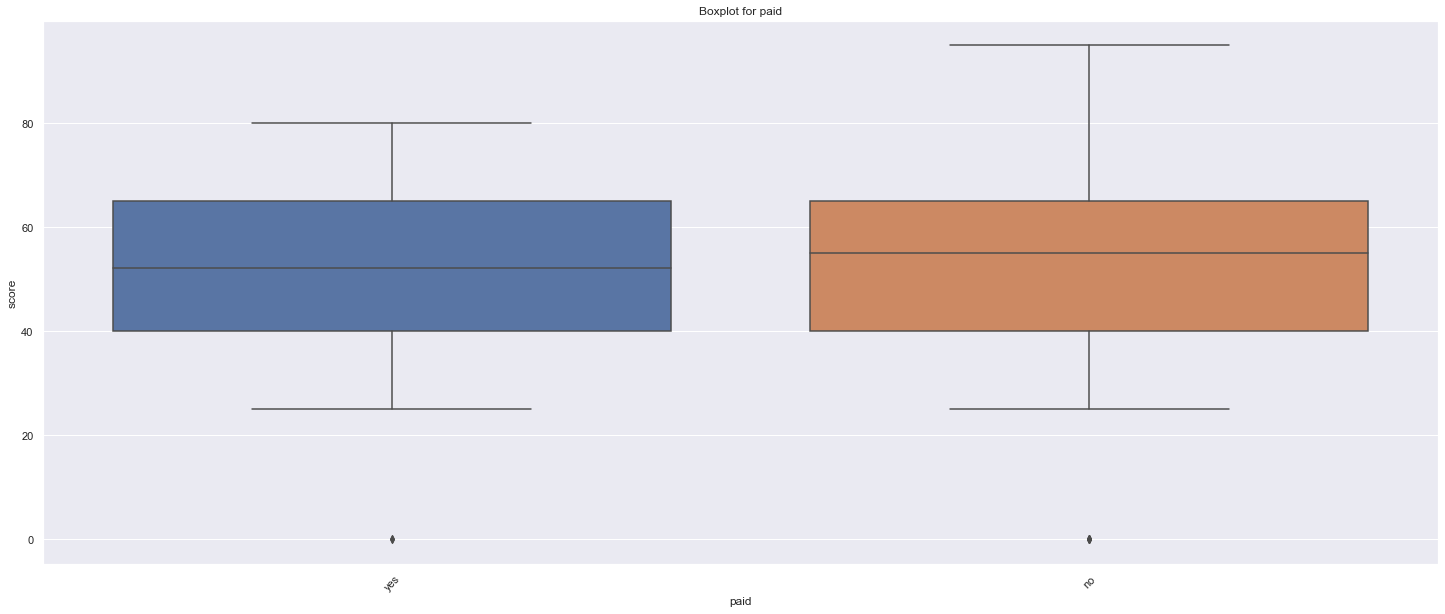

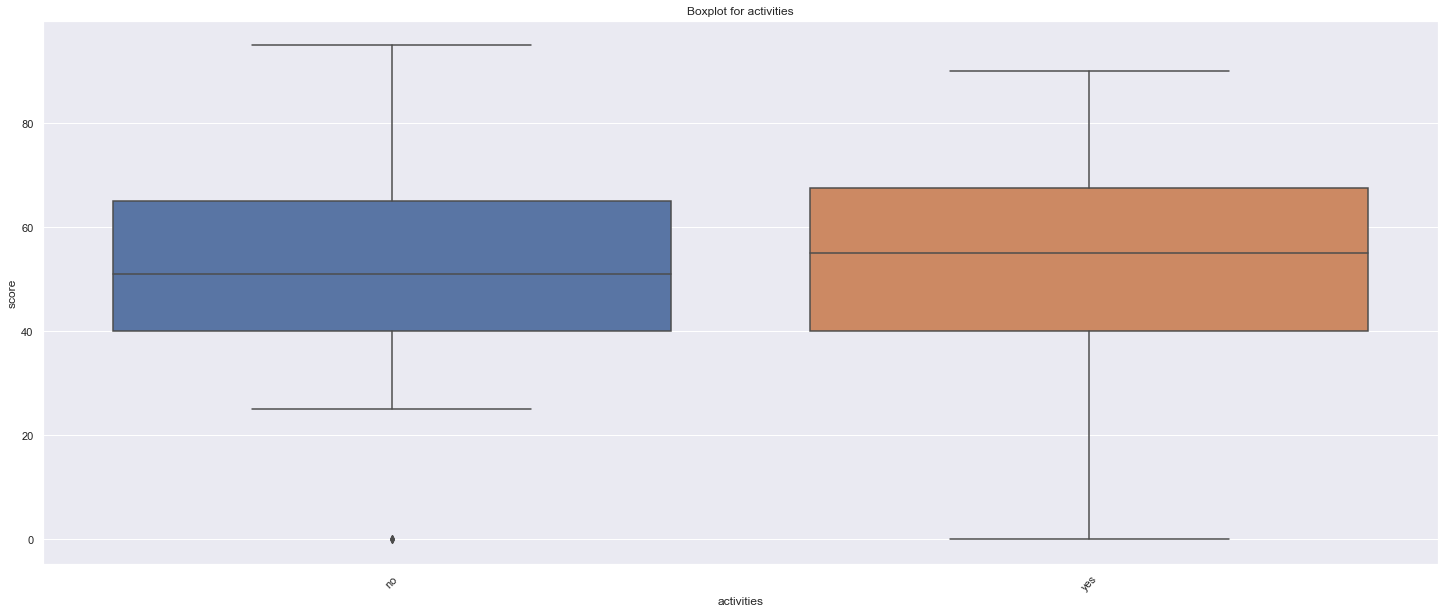

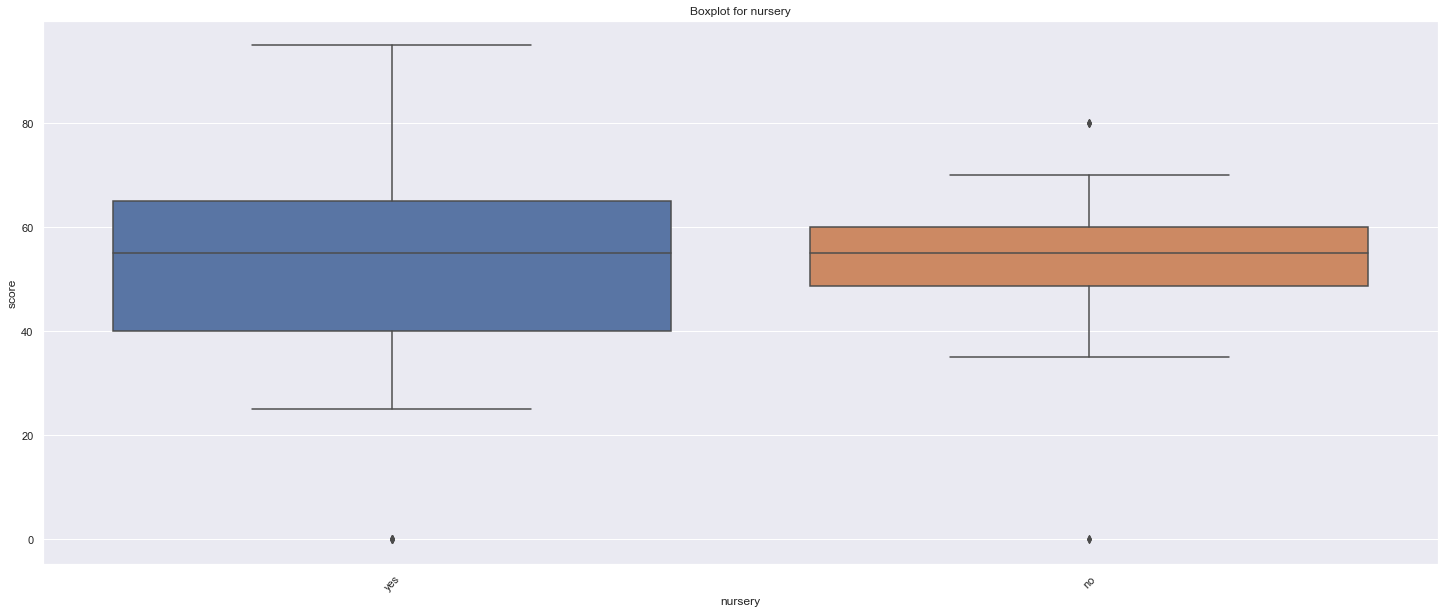

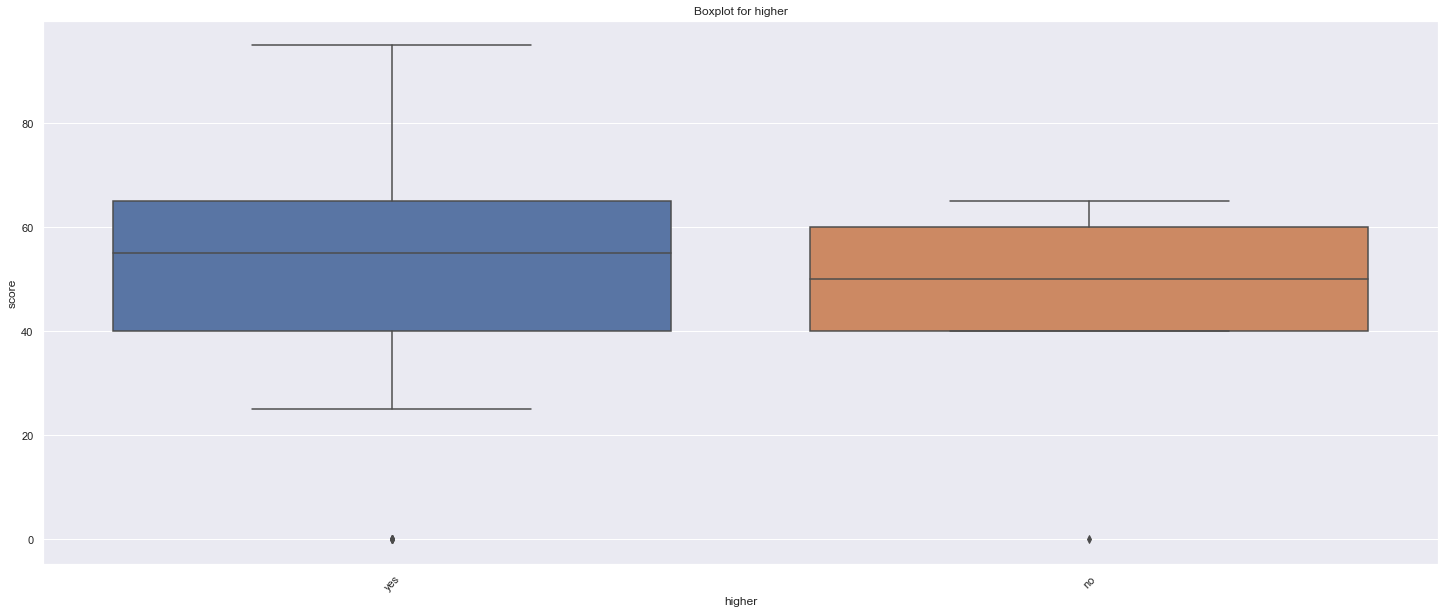

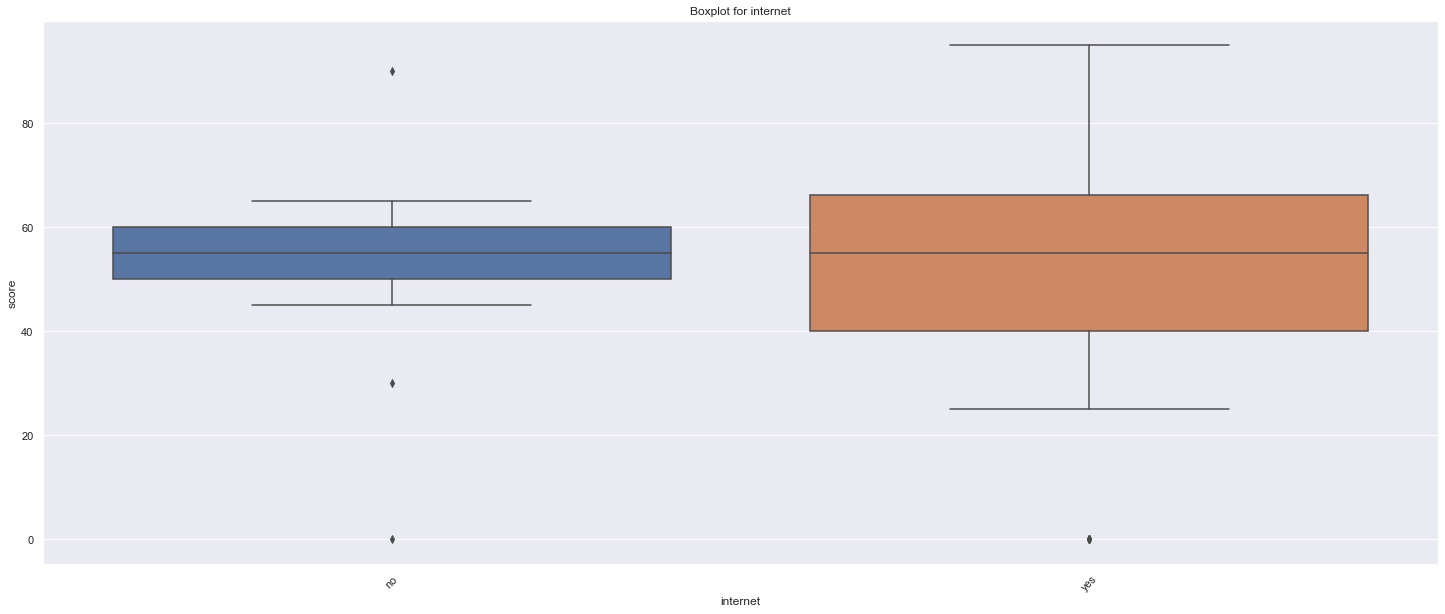

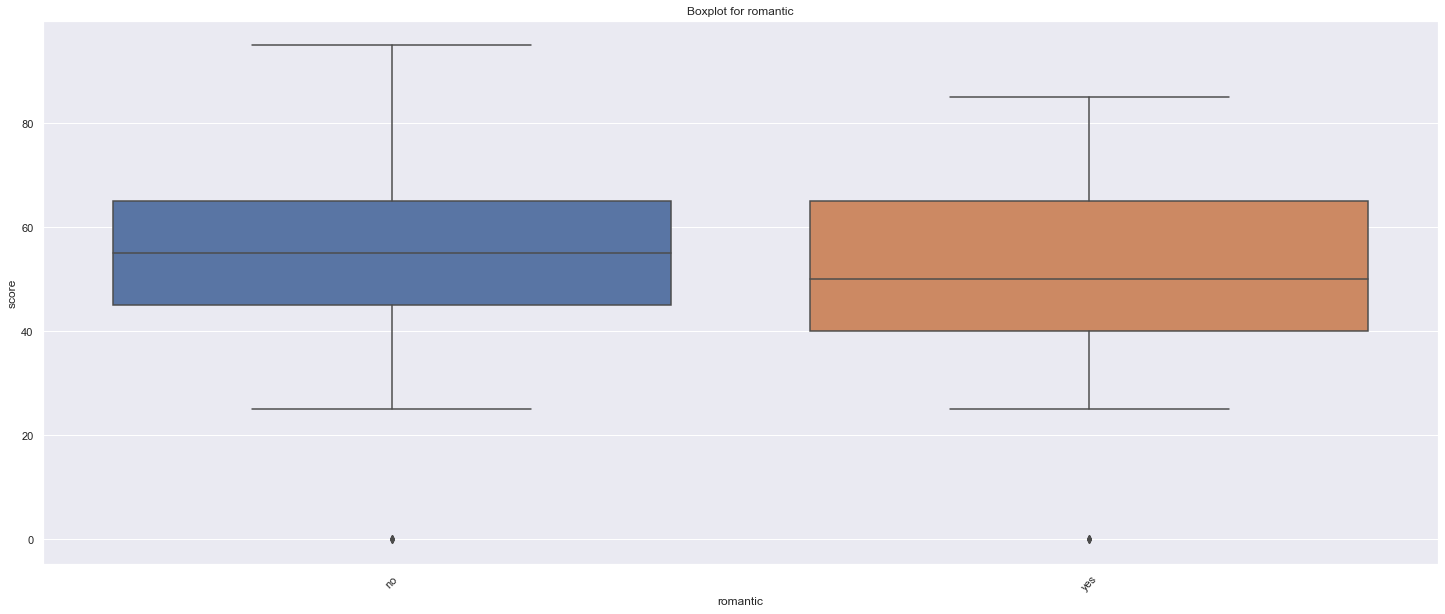

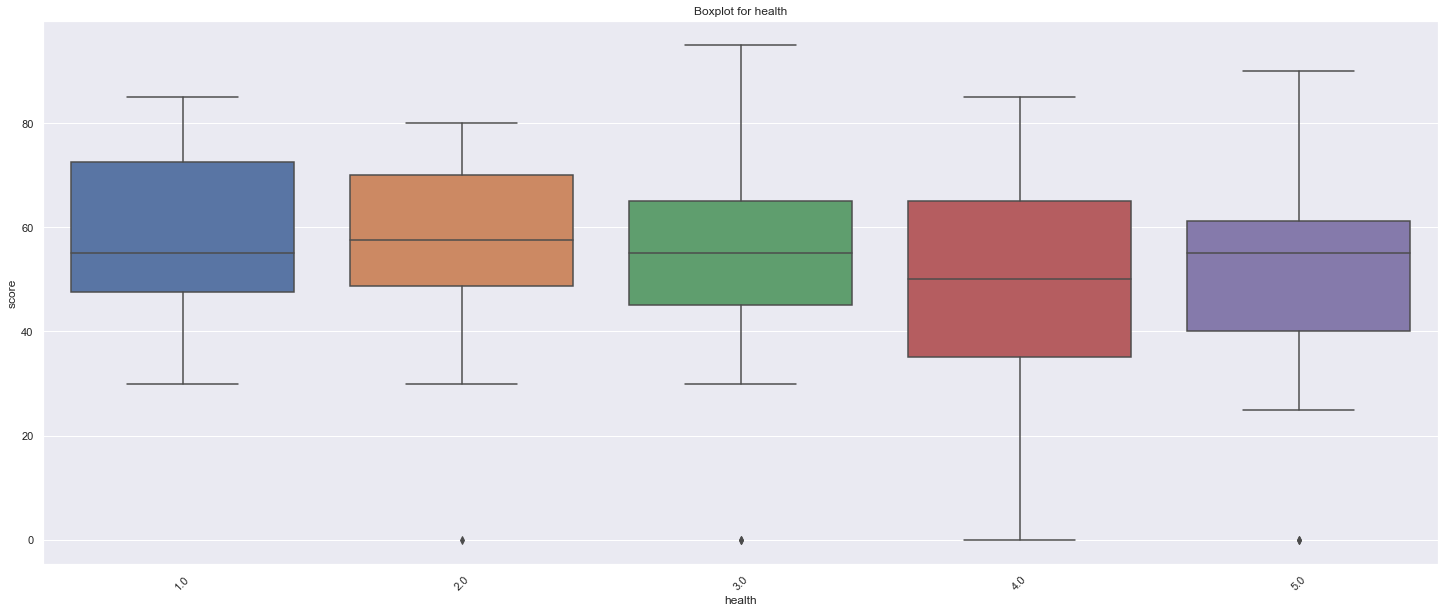

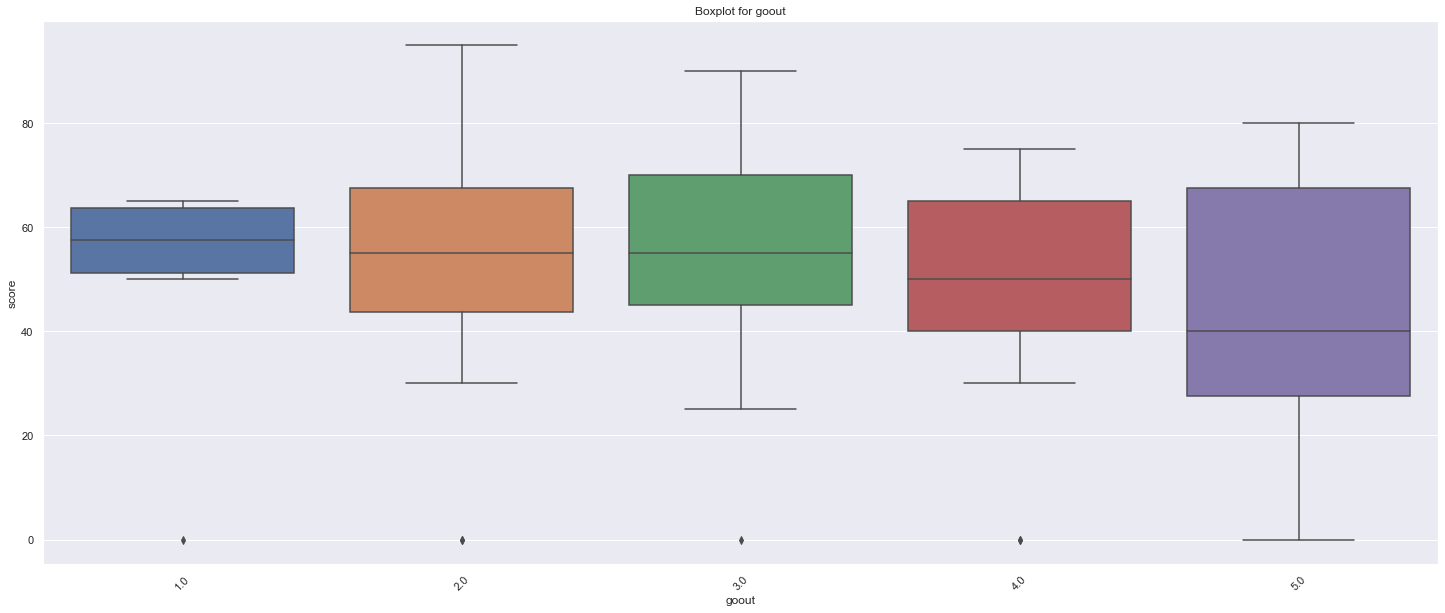

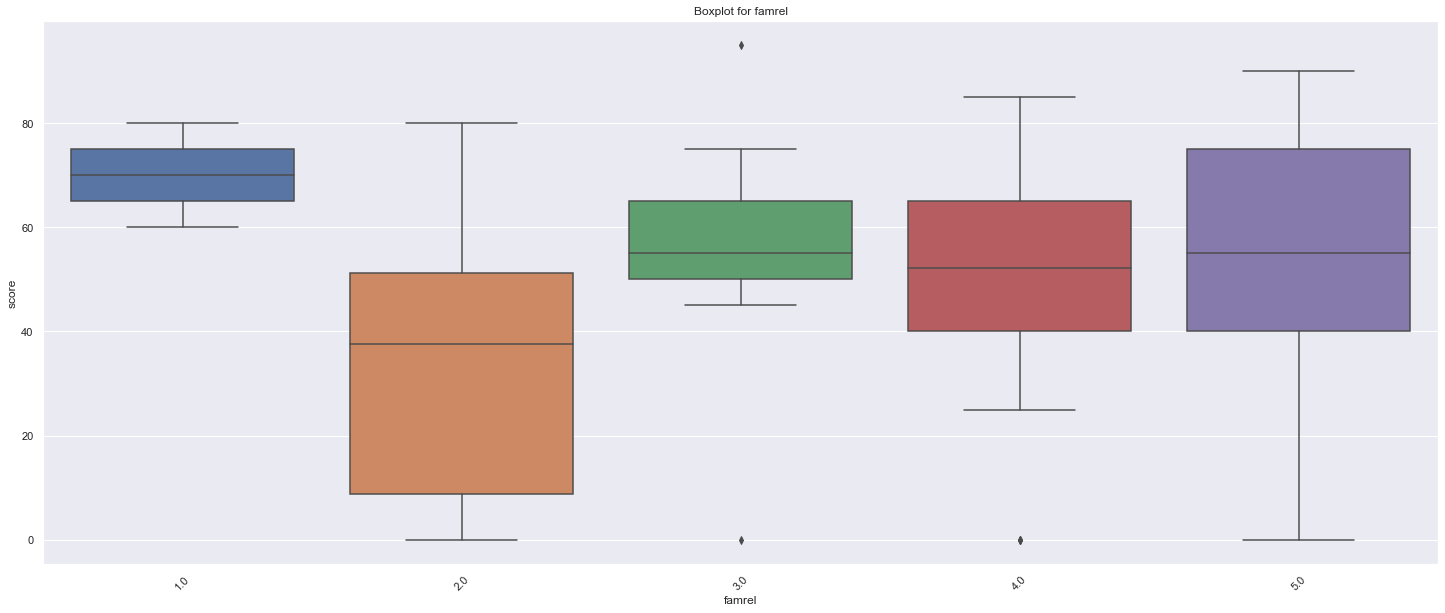

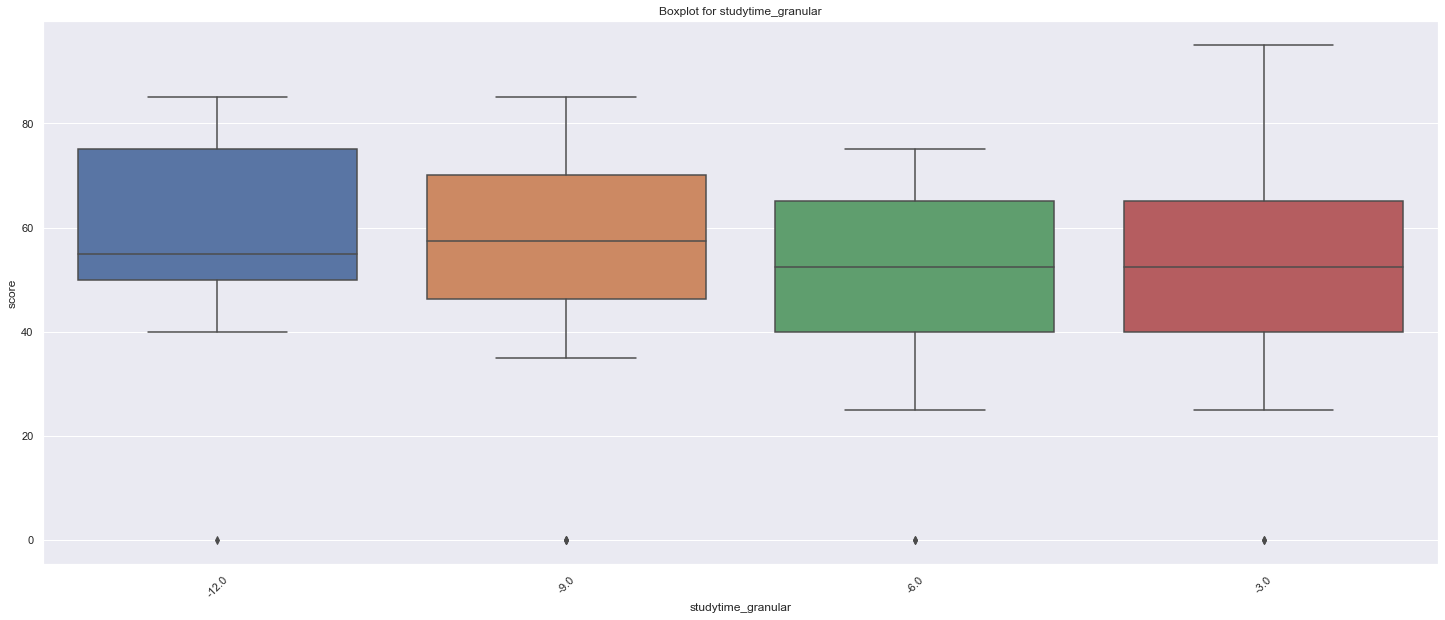

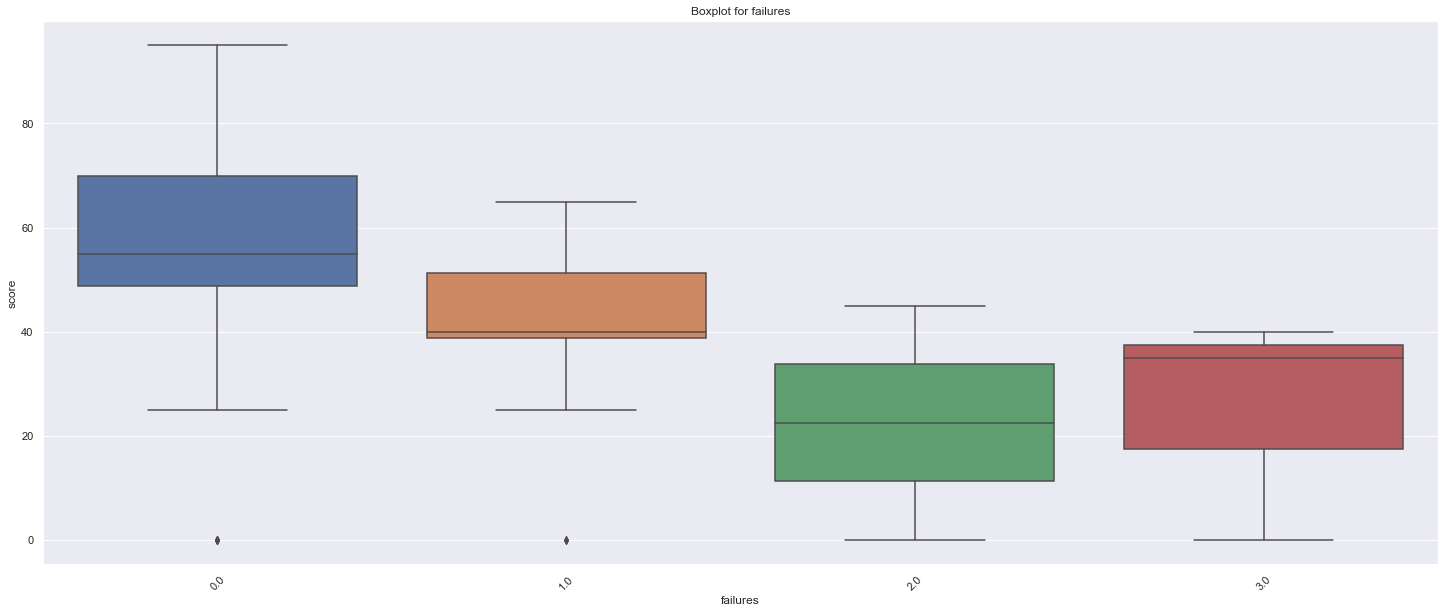

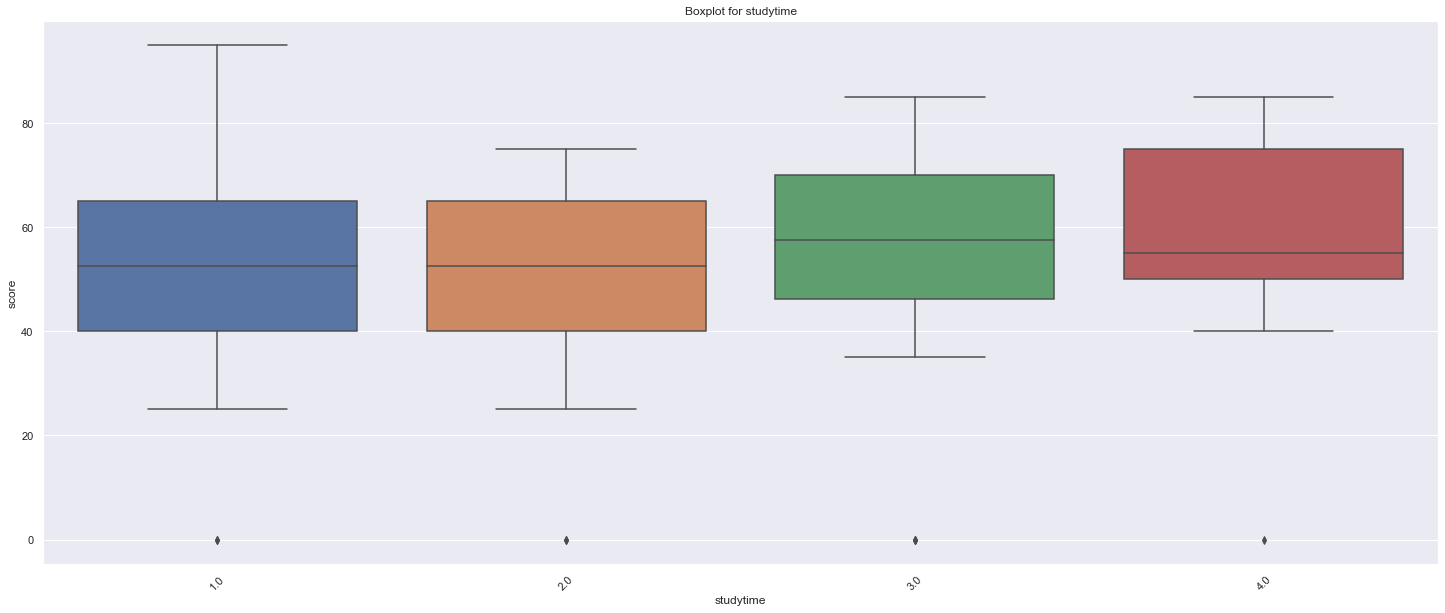

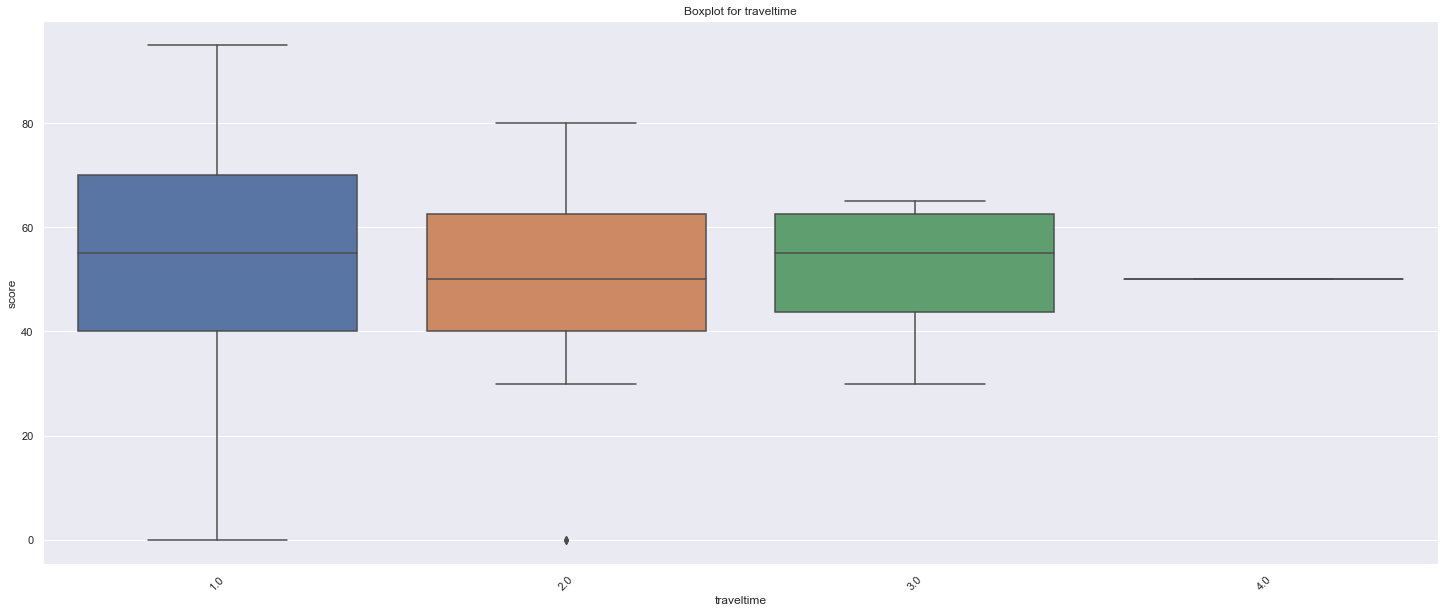

In [99]:
for column in ['school','sex', 'address', 'famsize', 'pstatus', 'mjob',
       'fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic',"health",  "goout", "famrel", "studytime_granular","failures", "studytime", "traveltime"]:
    get_boxplot(column)

In [ ]:
""""
Однако графики являются лишь вспомогательным инструментом, 
настоящую значимость различий может помочь распознать статистика.
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.
Проверим нулевую гипотезу о том, что влияние признаков на результаты экзамена по математике несущественны:
"""

In [100]:

from scipy import stats
import scipy
from itertools import combinations
#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
#pd.concat([df, col], axis=0, ignore_index=True)
from scipy.stats import ttest_ind
from itertools import combinations
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [106]:
for col in ['sex', 'address', 'famsize', 'pstatus', 'mjob',
'fjob', 'reason', 'guardian',
'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'higher', 'internet', 'romantic',"health",  "goout", "famrel", "studytime_granular", "failures", "studytime","traveltime"]:
    get_stat_dif (col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки failures


In [ ]:
Как мы видим, серьёзно влияют 3 номинальных признака: 'sex', 'address', 'failures'.
Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные номинативные переменные, которые, возможно,
оказывают влияние на оценку, это: 'sex', 'address', 'failures'.

In [ ]:
Выводы

Настало время подвести выводы.

Итак, в результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике 
были получены следующие выводы:

В данных достаточно мало пустых значений.
Выбросы найдены только в столбцах fedu и absences, что позволяет сделать вывод
о том, что данные достаточно чистые.
Выявлена отрицательная  корреляция параметра studytime_granular и studytime между собой(обратно-пропорциональная зависимость?).
Сильной  корреляции с score не выявлено ни у одного признака.
Поэтому параметры, которые предлагается использовать в дальнейшем для построения модели, это:
 'sex', 'address', 'failures'.
'age', 'medu', 'fedu(?)', 'traveltime', 'studytime', 'failures', 'studytime_granular'(?), 'famrel', 'goout', 'health', 'absences'



In [112]:
math_for_model = df[[ 'sex', 'address', 'failures',
'age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
'studytime_granular', 'famrel', 'goout', 'health', 'absences']]

In [113]:
                
math_for_model

,sex,address,failures,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,goout,health,absences
4,F,U,0.0,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,2.0,5.0,4.0
5,M,U,0.0,16,4.0,3.0,1.0,2.0,0.0,-6.0,5.0,2.0,5.0,10.0
7,F,U,0.0,17,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,4.0,1.0,6.0
10,F,U,0.0,15,4.0,4.0,1.0,2.0,0.0,-6.0,3.0,3.0,2.0,0.0
14,M,U,0.0,15,2.0,2.0,1.0,3.0,0.0,-9.0,4.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,M,R,0.0,18,2.0,1.0,2.0,1.0,0.0,-3.0,4.0,3.0,5.0,5.0
386,F,R,0.0,18,4.0,4.0,3.0,1.0,0.0,-3.0,4.0,3.0,5.0,7.0
387,F,R,1.0,19,2.0,3.0,1.0,3.0,1.0,-9.0,5.0,2.0,5.0,0.0
388,F,U,0.0,18,3.0,1.0,1.0,2.0,0.0,-6.0,4.0,4.0,1.0,0.0
